In [1]:
from torch.nn import CrossEntropyLoss

import CNN_lib as lib

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt
from torchsummary import summary


In [2]:
device= lib.use_GPU()

CUDA is available!  Training on GPU ...
cuda:0


Loading and normalizing the CIFAR10 datasets

In [3]:
# Define data transformation pipeline
transform = transforms.Compose([
    # Convert PIL images to PyTorch tensors
    transforms.ToTensor(),
    # Normalize pixel values
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the CIFAR-10 training dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

# Create data loader for training data with batch size 4 and shuffling
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

# Load the CIFAR-10 testing dataset
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

# Create data loader for testing data with batch size 1 and shuffling
testloader = torch.utils.data.DataLoader(testset, batch_size=1,
                                         shuffle=True, num_workers=2)

# Define class labels for CIFAR-10 dataset
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


Show some training images 

Train loader:
12500
{'frog': 5000, 'truck': 5000, 'deer': 5000, 'car': 5000, 'bird': 5000, 'horse': 5000, 'ship': 5000, 'cat': 5000, 'dog': 5000, 'plane': 5000}
torch.Size([4, 3, 32, 32])
dog car frog car

Test loader:
10000
{'cat': 1000, 'ship': 1000, 'plane': 1000, 'frog': 1000, 'car': 1000, 'truck': 1000, 'dog': 1000, 'horse': 1000, 'deer': 1000, 'bird': 1000}


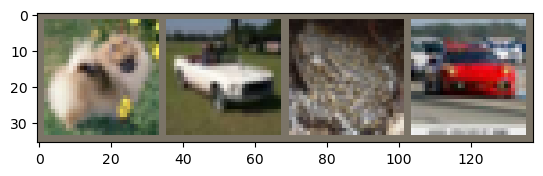

In [4]:
import matplotlib.pyplot as plt  # Import library for plotting
import numpy as np  # Import library for numerical computations
from collections import Counter  # Import Counter for counting elements

# Function to display an image
def imshow(image):
    mean=torch.tensor([0.485, 0.456, 0.406])
    std=torch.tensor([0.229, 0.224, 0.225])

    # Unnormalize the image channels to [0, 1]
    image = image.mul(std.unsqueeze(1).unsqueeze(2))  # More efficient element-wise multiplication
    image = image.add(mean.unsqueeze(1).unsqueeze(2))  # Efficient element-wise addition

    image= image.clamp(0, 1)

    # Convert the tensor to a NumPy array
    npimg = image.numpy()
    # Plot the image using matplotlib
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Transpose for correct display

# ------------------ Train Loader Section ------------------

print("Train loader:")

# Count the frequency of each class in the training set
stat = dict(Counter(trainset.targets))

# Create a new dictionary with class names as keys
new_stat = stat.copy()
for k in stat.keys():
    new_stat[classes[k]] = stat[k]
    del new_stat[k]

# Print the length of the train loader (number of batches)
print(len(trainloader))

# Print the class distribution in the training set
print(new_stat)

# Get a batch of random training images and their labels
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Print the shape of the image tensor (batch_size, channels, height, width)
print(images.shape)

# Display the images using the imshow function
imshow(torchvision.utils.make_grid(images))

# Print the labels of the images
print(' '.join('%s' % classes[labels[j]] for j in range(4)))  # Print labels for 4 images

# ------------------ Test Loader Section ------------------

print("\nTest loader:")

# Similar steps for the test loader
stat = dict(Counter(testset.targets))
new_stat = stat.copy()
for k in stat.keys():
    new_stat[classes[k]] = stat[k]
    del new_stat[k]

print(len(testloader))
print(new_stat)


In [5]:
#Create a standard Net as we saw at lesson
stdnet = lib.StandardNet()
stdnet.to(device)

StandardNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [74]:
# train a net with 
# -optimizer: SGD
# -criterion: CrossEntropyLoss
# -number of epochs: 20
# -learning rate: 0.001
# -momentum : 0.9

net1,train_loss, test_loss, acc = lib.train_net(Net = stdnet, trainloader = trainloader, testloader = testloader, epochs = 15, momentum = 0.9 ,criterion = nn.CrossEntropyLoss())

[epoch: 1] train loss: 1.6759 test loss: 1.3976,test accuracy: 50.0 %
[epoch: 2] train loss: 1.3309 test loss: 1.2726,test accuracy: 55.0 %
[epoch: 3] train loss: 1.2058 test loss: 1.2025,test accuracy: 57.8 %
[epoch: 4] train loss: 1.1155 test loss: 1.1923,test accuracy: 58.7 %
[epoch: 5] train loss: 1.0632 test loss: 1.2148,test accuracy: 57.9 %
[epoch: 6] train loss: 1.0128 test loss: 1.1689,test accuracy: 60.5 %
[epoch: 7] train loss: 0.9663 test loss: 1.1648,test accuracy: 60.5 %
[epoch: 8] train loss: 0.9370 test loss: 1.1562,test accuracy: 60.9 %
[epoch: 9] train loss: 0.9047 test loss: 1.1809,test accuracy: 60.8 %
[epoch: 10] train loss: 0.8819 test loss: 1.2027,test accuracy: 59.7 %
[epoch: 11] train loss: 0.8557 test loss: 1.2089,test accuracy: 60.9 %
[epoch: 12] train loss: 0.8378 test loss: 1.2213,test accuracy: 62.1 %
[epoch: 13] train loss: 0.8242 test loss: 1.2922,test accuracy: 60.2 %
[epoch: 14] train loss: 0.8084 test loss: 1.2325,test accuracy: 60.5 %
[epoch: 15] tra

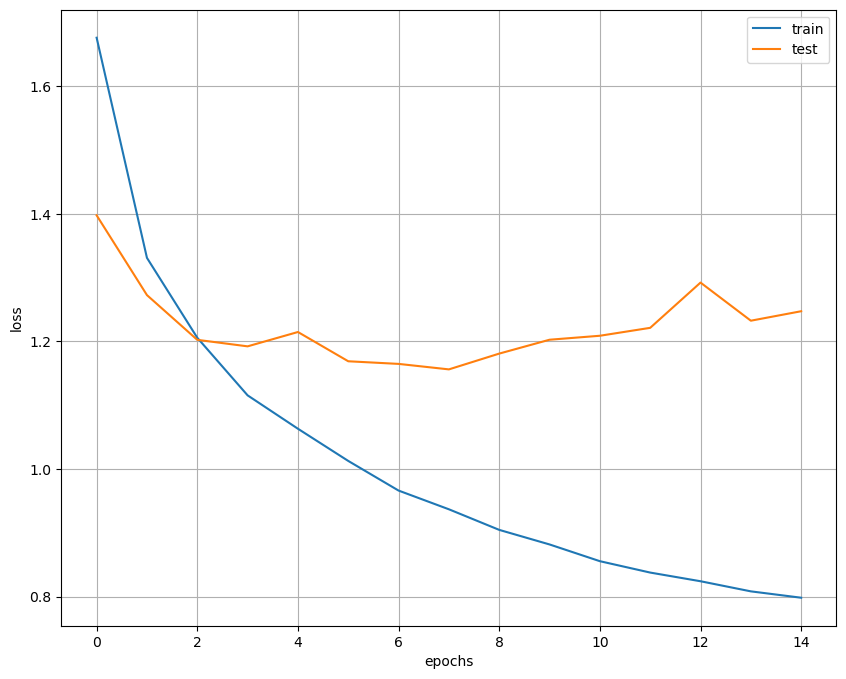

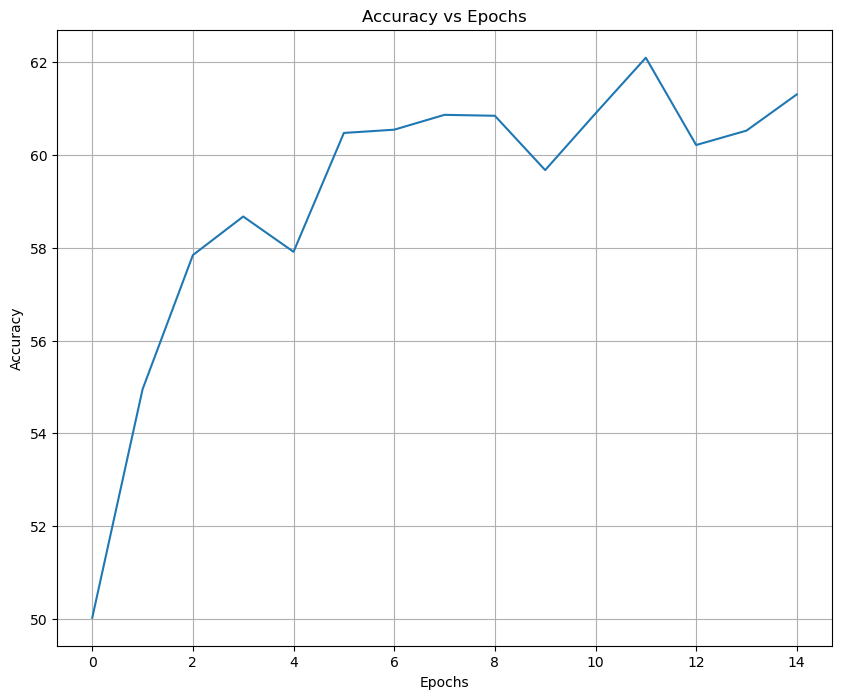

In [76]:
plot_losses(train_loss,test_loss)
plt.figure(figsize=(10,8))
plt.title("Accuracy vs Epochs")
plt.plot(np.arange(len(acc) ),acc) 
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [17]:
#torch.save(net1.state_dict(), 'net1.pth')


netload = lib.StandardNet()
netload.state_dict(torch.load("net1.pth"))

/home/claudio/anaconda3/envs/pytorch_env/lib/python3.11/site-packages/torch/nn/modules/module.py:1877: UserWarning: Positional args are being deprecated, use kwargs instead. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(


OrderedDict([('conv1.weight',
              tensor([[[[-3.6341e-02, -1.0483e-01, -8.2046e-02,  8.0854e-02, -9.6846e-02],
                        [-5.8166e-02,  1.8001e-02, -1.0087e-01, -3.4723e-02, -2.9866e-02],
                        [ 1.2013e-02, -2.1881e-03, -9.9583e-02, -3.5046e-02,  6.2736e-03],
                        [-8.2422e-03, -4.9090e-02,  1.0308e-01, -5.3867e-02,  2.5687e-02],
                        [ 8.0799e-02,  1.0587e-01, -1.0103e-01, -1.1181e-01,  7.1906e-02]],
              
                       [[ 1.3452e-02, -1.7719e-02, -1.1662e-03, -1.1074e-01,  1.1091e-01],
                        [-8.0660e-02,  5.6008e-02,  9.8167e-02, -5.3695e-02,  3.4328e-02],
                        [ 6.7018e-02, -9.3607e-02, -5.6064e-02,  6.4883e-02,  6.5549e-02],
                        [ 8.2119e-03, -1.1165e-01, -4.7960e-02, -9.9005e-02, -4.6318e-02],
                        [-2.0094e-02,  6.0434e-02, -8.3688e-02,  2.7956e-02,  9.2752e-02]],
              
                       [[-3.

In [4]:
# Initialize variables to track accuracy
def evaluateModel(net, testloader, device):
    correct = 0
    total = 0
    
    # Disable gradient calculation for better performance during evaluation
    with torch.no_grad():
        # Loop over the test loader
        for data in testloader:
            # Get the image and label from the current batch
            image, label = data
    
            # Move the image data to the specified device (CPU or GPU)
            image = image.to(device)
    
            # Get the network's prediction for the image
            output = net(image)
            # smax = torch.nn.Softmax(dim=1)(output.cpu())
    
            # Find the class with the highest probability
            _, predicted = torch.max(output.cpu(), 1)  # Equivalent to pred = torch.argmax(output.cpu(), dim=1)
    
            # Update total number of test images
            total += label.size(0)  # label.size(0) gives the batch size
    
            # Count correct predictions
            correct += (predicted == label).sum().item()  # Count true positives
    
    # Calculate and print accuracy
    print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))
    return

In [19]:
evaluateModel(netload, testloader, device)

Accuracy of the network on the 10000 test images: 65 %


In [7]:
# train a net with 
# -optimizer: SGD
# -criterion: CrossEntropyLoss
# -number of epochs: 20
# -learning rate: 0.01
# -momentum : 0.9

net2,train_loss, test_loss = lib.train_net(Net = stdnet, trainloader = trainloader, testloader = testloader, learning_rate=0.01, epochs = 20, criterion = nn.CrossEntropyLoss())

[epoch: 1] train loss: 1.4816 test loss: 1.3183
[epoch: 2] train loss: 1.2761 test loss: 1.3098
[epoch: 3] train loss: 1.1733 test loss: 1.2036
[epoch: 4] train loss: 1.1014 test loss: 1.2094
[epoch: 5] train loss: 1.0505 test loss: 1.1501
[epoch: 6] train loss: 0.9983 test loss: 1.1755
[epoch: 7] train loss: 0.9645 test loss: 1.1916
[epoch: 8] train loss: 0.9263 test loss: 1.1294
[epoch: 9] train loss: 0.9091 test loss: 1.1815
[epoch: 10] train loss: 0.8803 test loss: 1.2072
[epoch: 11] train loss: 0.8649 test loss: 1.2013
[epoch: 12] train loss: 0.8534 test loss: 1.2195
[epoch: 13] train loss: 0.8258 test loss: 1.2621
[epoch: 14] train loss: 0.8137 test loss: 1.2665
[epoch: 15] train loss: 0.8005 test loss: 1.2804
[epoch: 16] train loss: 0.7925 test loss: 1.3585
[epoch: 17] train loss: 0.7876 test loss: 1.3138
[epoch: 18] train loss: 0.7801 test loss: 1.2971
[epoch: 19] train loss: 0.7711 test loss: 1.3483
[epoch: 20] train loss: 0.7659 test loss: 1.3465
Finished Training


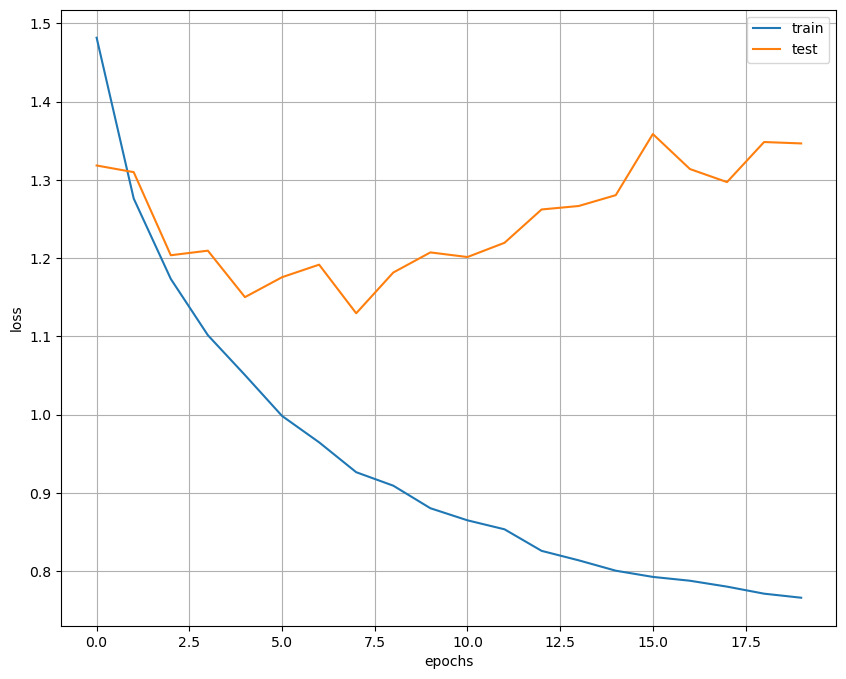

In [8]:
test_loss = [tensor.cpu() for tensor in test_loss]
fig = plt.figure(figsize=(10,8))
x = np.arange(np.shape(train_loss)[0])
plt.plot(x,train_loss, label = 'train loss')
plt.plot(x,test_loss, label = 'test loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.show()

In [9]:
#torch.save(net2.state_dict(), 'net2.pth')


In [13]:
# train a net with 
# -optimizer: SGD
# -criterion: CrossEntropyLoss
# -number of epochs: 20
# -learning rate: 0.0001
# -momentum : 0.9
stdnet=lib.StandardNet()
stdnet.to(device)
net3,train_loss, test_loss = lib.train_net(Net = stdnet, trainloader = trainloader, testloader = testloader, learning_rate=0.0001, epochs = 20, criterion = nn.CrossEntropyLoss())

[epoch: 1] train loss: 2.2989 test loss: 2.2897
[epoch: 2] train loss: 2.2787 test loss: 2.2538
[epoch: 3] train loss: 2.2317 test loss: 2.1834
[epoch: 4] train loss: 2.1485 test loss: 2.0760
[epoch: 5] train loss: 2.0435 test loss: 1.9854
[epoch: 6] train loss: 1.9691 test loss: 1.9263
[epoch: 7] train loss: 1.9135 test loss: 1.8747
[epoch: 8] train loss: 1.8606 test loss: 1.8144
[epoch: 9] train loss: 1.8020 test loss: 1.7618
[epoch: 10] train loss: 1.7496 test loss: 1.7139
[epoch: 11] train loss: 1.7093 test loss: 1.6799
[epoch: 12] train loss: 1.6685 test loss: 1.6473
[epoch: 13] train loss: 1.6414 test loss: 1.6146
[epoch: 14] train loss: 1.6131 test loss: 1.5893
[epoch: 15] train loss: 1.5873 test loss: 1.5640
[epoch: 16] train loss: 1.5637 test loss: 1.5422
[epoch: 17] train loss: 1.5419 test loss: 1.5173
[epoch: 18] train loss: 1.5167 test loss: 1.4981
[epoch: 19] train loss: 1.4962 test loss: 1.4794
[epoch: 20] train loss: 1.4793 test loss: 1.4644
Finished Training


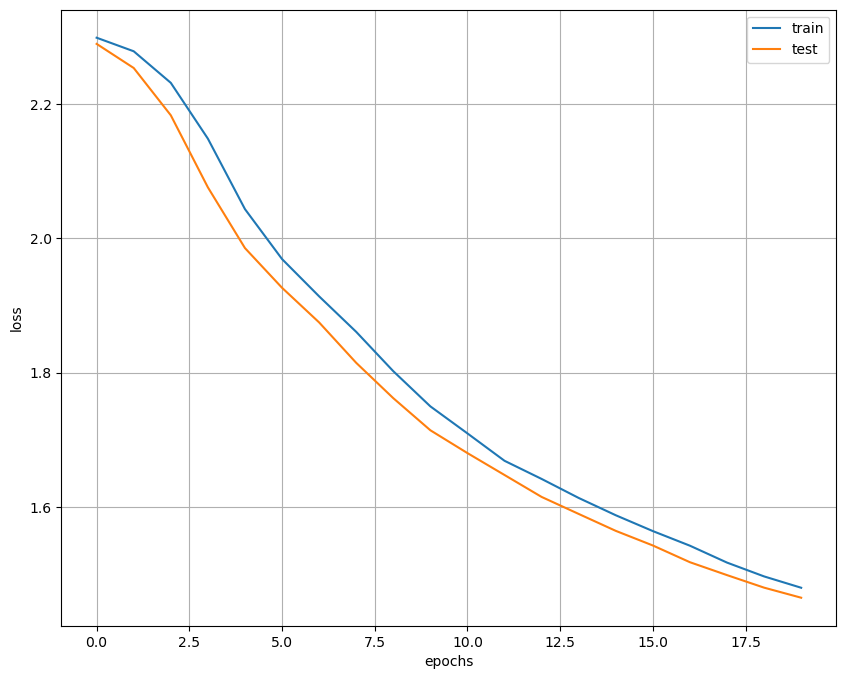

In [14]:
test_loss = [tensor.cpu() for tensor in test_loss]

fig = plt.figure(figsize=(10,8))
x = np.arange(np.shape(train_loss)[0])
plt.plot(x,train_loss, label = 'train')
plt.plot(x,test_loss, label = 'test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.show()

In [15]:
net3,train_loss2, test_loss2 = lib.train_net(Net = stdnet, trainloader = trainloader, testloader = testloader, learning_rate=0.0001, epochs = 20, criterion = nn.CrossEntropyLoss())

[epoch: 1] train loss: 1.4632 test loss: 1.4478
[epoch: 2] train loss: 1.4422 test loss: 1.4374
[epoch: 3] train loss: 1.4282 test loss: 1.4182
[epoch: 4] train loss: 1.4132 test loss: 1.4194
[epoch: 5] train loss: 1.4057 test loss: 1.4027
[epoch: 6] train loss: 1.3939 test loss: 1.4041
[epoch: 7] train loss: 1.3797 test loss: 1.3773
[epoch: 8] train loss: 1.3682 test loss: 1.3814
[epoch: 9] train loss: 1.3576 test loss: 1.3623
[epoch: 10] train loss: 1.3511 test loss: 1.3511
[epoch: 11] train loss: 1.3417 test loss: 1.3429
[epoch: 12] train loss: 1.3310 test loss: 1.3381
[epoch: 13] train loss: 1.3232 test loss: 1.3307
[epoch: 14] train loss: 1.3110 test loss: 1.3251
[epoch: 15] train loss: 1.2997 test loss: 1.3168
[epoch: 16] train loss: 1.2927 test loss: 1.3133
[epoch: 17] train loss: 1.2861 test loss: 1.3005
[epoch: 18] train loss: 1.2790 test loss: 1.2975
[epoch: 19] train loss: 1.2647 test loss: 1.2876
[epoch: 20] train loss: 1.2616 test loss: 1.2778
Finished Training


In [5]:
def plot_losses(train_loss,test_loss):
    fig = plt.figure(figsize=(10,8))
    x = np.arange(np.shape(train_loss)[0])
    plt.plot(x,train_loss, label = 'train')
    plt.plot(x,test_loss, label = 'test')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.grid()
    plt.show()
    return

In [24]:
test_loss2 = [tensor.cpu() for tensor in test_loss2]

train_loss_list =train_loss + train_loss2
test_loss_list = test_loss + test_loss2


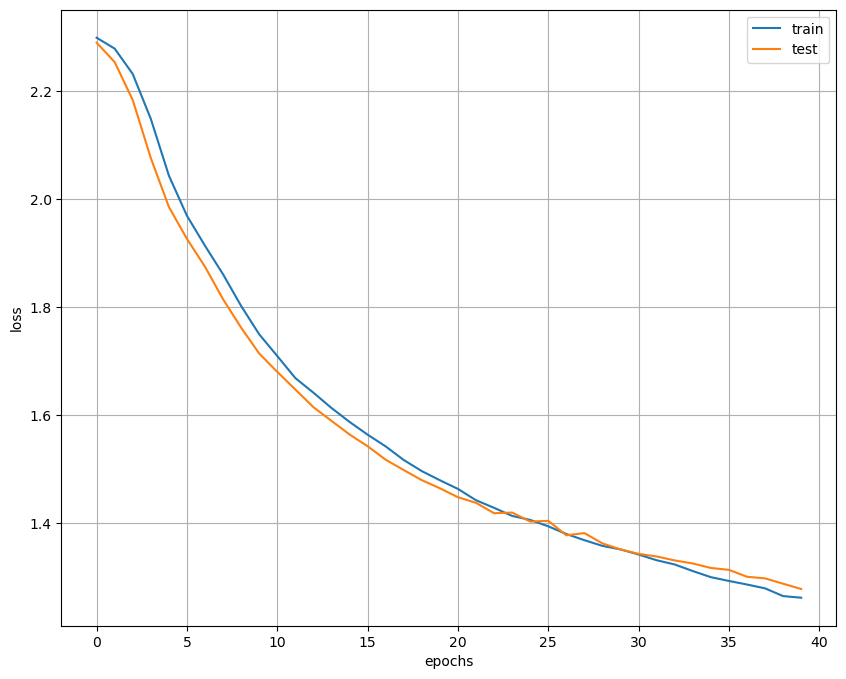

In [25]:
plot_losses(train_loss_list, test_loss_list)

In [30]:
evaluateModel(net3, testloader,device)

Accuracy of the network on the 10000 test images: 54 %


Add another 20 epochs

In [31]:
net3,train_loss3, test_loss3 = lib.train_net(Net = stdnet, trainloader = trainloader, testloader = testloader, learning_rate=0.0001, epochs = 20, criterion = nn.CrossEntropyLoss())

[epoch: 1] train loss: 1.2497 test loss: 1.2774
[epoch: 2] train loss: 1.2414 test loss: 1.2684
[epoch: 3] train loss: 1.2330 test loss: 1.2640
[epoch: 4] train loss: 1.2209 test loss: 1.2607
[epoch: 5] train loss: 1.2188 test loss: 1.2751
[epoch: 6] train loss: 1.2119 test loss: 1.2483
[epoch: 7] train loss: 1.2032 test loss: 1.2362
[epoch: 8] train loss: 1.1975 test loss: 1.2338
[epoch: 9] train loss: 1.1876 test loss: 1.2342
[epoch: 10] train loss: 1.1785 test loss: 1.2249
[epoch: 11] train loss: 1.1735 test loss: 1.2290
[epoch: 12] train loss: 1.1679 test loss: 1.2171
[epoch: 13] train loss: 1.1602 test loss: 1.2064
[epoch: 14] train loss: 1.1517 test loss: 1.1975
[epoch: 15] train loss: 1.1442 test loss: 1.1994
[epoch: 16] train loss: 1.1332 test loss: 1.1876
[epoch: 17] train loss: 1.1250 test loss: 1.1962
[epoch: 18] train loss: 1.1233 test loss: 1.1816
[epoch: 19] train loss: 1.1166 test loss: 1.1758
[epoch: 20] train loss: 1.1121 test loss: 1.1677
Finished Training


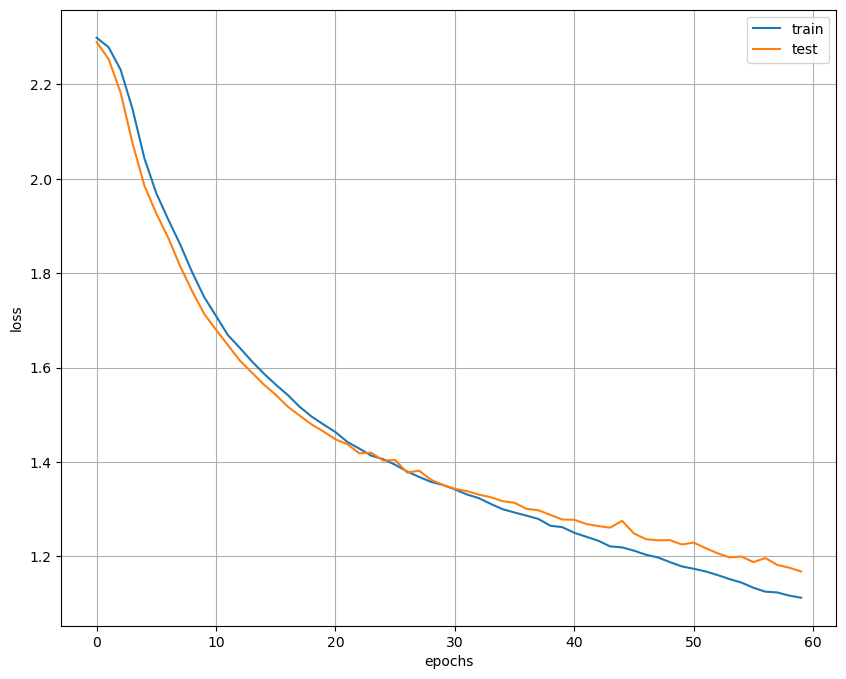

In [41]:
test_loss3 = [tensor.cpu() for tensor in test_loss3]

train_loss_list =train_loss + train_loss2 + train_loss3
test_loss_list = test_loss + test_loss2 + test_loss3

plot_losses(train_loss_list, test_loss_list)

In [42]:
evaluateModel(net3, testloader,device)

Accuracy of the network on the 10000 test images: 58 %


another 10 epochs

In [43]:
net3,train_loss4, test_loss4 = lib.train_net(Net = stdnet, trainloader = trainloader, testloader = testloader, learning_rate=0.0001, epochs = 10, criterion = nn.CrossEntropyLoss())

[epoch: 1] train loss: 1.1024 test loss: 1.1645
[epoch: 2] train loss: 1.0995 test loss: 1.1679
[epoch: 3] train loss: 1.0917 test loss: 1.1511
[epoch: 4] train loss: 1.0849 test loss: 1.1625
[epoch: 5] train loss: 1.0791 test loss: 1.1598
[epoch: 6] train loss: 1.0702 test loss: 1.1332
[epoch: 7] train loss: 1.0685 test loss: 1.1712
[epoch: 8] train loss: 1.0606 test loss: 1.1350
[epoch: 9] train loss: 1.0518 test loss: 1.1324
[epoch: 10] train loss: 1.0524 test loss: 1.1476
Finished Training


test_loss4 = [tensor.cpu() for tensor in test_loss4]

train_loss_list =train_loss + train_loss2 + train_loss3 + train_loss4
test_loss_list = test_loss + test_loss2 + test_loss3 + test_loss4

plot_losses(train_loss_list, test_loss_list)

In [45]:
evaluateModel(net3, testloader,device)

Accuracy of the network on the 10000 test images: 59 %


In [48]:
#torch.save(net3.state_dict(),'net3.pth')

In [8]:
class Conv3Net(nn.Module):
    """
    This class defines a simple convolutional neural network (CNN) architecture
    for image classification.

    Attributes:
        conv1 (nn.Conv2d): First convolutional layer with 3 input channels (RGB),
                           6 output channels, and a kernel size of 5x5.
        pool (nn.MaxPool2d): Max pooling layer with a kernel size of 2x2.
        conv2 (nn.Conv2d): Second convolutional layer with 6 input channels
                           (from the first conv layer), 16 output channels,
                           and a kernel size of 5x5.
        fc1 (nn.Linear): First fully-connected layer that flattens the input
                         from the previous convolutional layers and has 120 neurons.
        fc2 (nn.Linear): Second fully-connected layer with 84 neurons.
        fc3 (nn.Linear): Output layer with 10 neurons, corresponding to the 10 classes
                         in CIFAR-10.

    Methods:
        forward(self, x): Defines the forward pass of the network.
    """
    
    
    def __init__(self):
        super(Conv3Net, self).__init__()  # Call the superclass constructor
        self.conv1 = nn.Conv2d(3, 32, 3)  # First convolutional layer
        self.pool = nn.MaxPool2d(2, 2)  # Max pooling layer
        self.conv2 = nn.Conv2d(32, 64, 3)  # Second convolutional layer
        self.conv3 = nn.Conv2d(64, 64, 3)  # First convolutional layer
  
        self.fc1 = nn.Linear(64 * 2 * 2, 128)  # First fully-connected layer
        self.fc2 = nn.Linear(128, 96)  # Second fully-connected layer
        self.fc3 = nn.Linear(96, 84)
        self.fc4 = nn.Linear(84, 10)  # Output layer
   
    def forward(self, x):
        """"
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): Input tensor representing the images.

        Returns:
            torch.Tensor: Output tensor representing the class probabilities.
        """
        x = self.pool(F.relu(self.conv1(x)))  # First convolutional layer with ReLU activation and pooling
        x = self.pool(F.relu(self.conv2(x)))  # Second convolutional layer with ReLU activation and pooling
        x = self.pool(F.relu(self.conv3(x)))  # Third convolutional layer with ReLU activation and pooling
        # print(x.shape)
       
        x = x.view(x.shape[0],-1)  # Flatten the output from convolutional layers
        # print(x.shape)
        x = F.relu(self.fc1(x))  # First fully-connected layer with ReLU activation
        x = F.relu(self.fc2(x))  # Second fully-connected layer with ReLU activation
        x = F.gelu(self.fc3(x))
        x = self.fc4(x)  # Output layer
      
        return x
    

In [11]:
# train a net with 
# -optimizer: SGD
# -criterion: CrossEntropyLoss
# -number of epochs: 5
# -learning rate: 0.001
# -momentum : 0.9
net3conv=Conv3Net()
net3conv.to(device)

net3conv1,train_loss, test_loss = lib.train_net(Net = net3conv, trainloader = trainloader, testloader = testloader, learning_rate=0.001, epochs = 10, criterion = nn.CrossEntropyLoss())

[epoch: 1] train loss: 2.3021 test loss: 2.3008,test accuracy: 14.3 %
[epoch: 2] train loss: 2.2990 test loss: 2.2908,test accuracy: 21.4 %
[epoch: 3] train loss: 2.1907 test loss: 1.9202,test accuracy: 27.1 %
[epoch: 4] train loss: 1.7964 test loss: 1.6562,test accuracy: 37.6 %
[epoch: 5] train loss: 1.6174 test loss: 1.5368,test accuracy: 43.4 %
[epoch: 6] train loss: 1.4905 test loss: 1.4096,test accuracy: 48.6 %
[epoch: 7] train loss: 1.3526 test loss: 1.2855,test accuracy: 53.2 %
[epoch: 8] train loss: 1.2508 test loss: 1.2183,test accuracy: 55.4 %
[epoch: 9] train loss: 1.1670 test loss: 1.2459,test accuracy: 55.3 %
[epoch: 10] train loss: 1.0962 test loss: 1.0955,test accuracy: 60.4 %
Finished Training


In [12]:
net3conv1b,train_loss, test_loss = lib.train_net(Net = net3conv, trainloader = trainloader, testloader = testloader, learning_rate=0.001, epochs = 5, criterion = nn.CrossEntropyLoss())

[epoch: 1] train loss: 1.0321 test loss: 1.0793,test accuracy: 62.3 %
[epoch: 2] train loss: 0.9768 test loss: 1.0041,test accuracy: 64.7 %
[epoch: 3] train loss: 0.9247 test loss: 0.9702,test accuracy: 66.0 %
[epoch: 4] train loss: 0.8773 test loss: 0.9575,test accuracy: 66.8 %
[epoch: 5] train loss: 0.8358 test loss: 0.9401,test accuracy: 67.3 %
Finished Training


In [13]:
net3conv1b,train_loss, test_loss = lib.train_net(Net = net3conv, trainloader = trainloader, testloader = testloader, learning_rate=0.001, epochs = 5, criterion = nn.CrossEntropyLoss())


[epoch: 1] train loss: 0.7961 test loss: 0.9354,test accuracy: 67.9 %
[epoch: 2] train loss: 0.7603 test loss: 0.9066,test accuracy: 69.1 %
[epoch: 3] train loss: 0.7260 test loss: 0.8779,test accuracy: 70.1 %
[epoch: 4] train loss: 0.6905 test loss: 0.8558,test accuracy: 70.5 %
[epoch: 5] train loss: 0.6620 test loss: 0.8943,test accuracy: 69.9 %
Finished Training


In [69]:
#test_loss = [tensor.cpu() for tensor in test_loss]
#trl = train_loss
#tsl = test_loss

In [70]:
"""for i in range(10):
    print("#"*10, f"epoch: {5 +i +1}")
    net3conv1,train_loss, test_loss = lib.train_net(Net = net3conv1, trainloader = trainloader, testloader = testloader, learning_rate=0.001, epochs = 1, criterion = nn.CrossEntropyLoss())
    evaluateModel(net3conv1,testloader,device)
    trl.append(train_loss)
    tsl.append(test_loss.cpu())
    """

########## epoch: 6
[epoch: 1] train loss: 1.2745 test loss: 1.2534
Finished Training
Accuracy of the network on the 10000 test images: 55 %
########## epoch: 7
[epoch: 1] train loss: 1.1929 test loss: 1.1682
Finished Training
Accuracy of the network on the 10000 test images: 58 %
########## epoch: 8
[epoch: 1] train loss: 1.1222 test loss: 1.1224
Finished Training
Accuracy of the network on the 10000 test images: 59 %
########## epoch: 9
[epoch: 1] train loss: 1.0598 test loss: 1.0936
Finished Training
Accuracy of the network on the 10000 test images: 61 %
########## epoch: 10
[epoch: 1] train loss: 1.0042 test loss: 1.0344
Finished Training
Accuracy of the network on the 10000 test images: 63 %
########## epoch: 11
[epoch: 1] train loss: 0.9553 test loss: 0.9963
Finished Training
Accuracy of the network on the 10000 test images: 65 %
########## epoch: 12
[epoch: 1] train loss: 0.9059 test loss: 0.9699
Finished Training
Accuracy of the network on the 10000 test images: 65 %
##########

In [67]:
#!pip install torchsummary

from torchsummary import summary
summary(net3conv1,(3,32,32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]             896
         MaxPool2d-2           [-1, 32, 15, 15]               0
            Conv2d-3           [-1, 64, 13, 13]          18,496
         MaxPool2d-4             [-1, 64, 6, 6]               0
            Conv2d-5             [-1, 64, 4, 4]          36,928
         MaxPool2d-6             [-1, 64, 2, 2]               0
            Linear-7                  [-1, 120]          30,840
            Linear-8                   [-1, 84]          10,164
            Linear-9                   [-1, 10]             850
Total params: 98,174
Trainable params: 98,174
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.39
Params size (MB): 0.37
Estimated Total Size (MB): 0.77
---------------------------------------------

In [6]:
class Conv3Net2(nn.Module):
    """
    This class defines a simple convolutional neural network (CNN) architecture
    for image classification.

    Attributes:
        conv1 (nn.Conv2d): First convolutional layer with 3 input channels (RGB),
                           6 output channels, and a kernel size of 5x5.
        pool (nn.MaxPool2d): Max pooling layer with a kernel size of 2x2.
        conv2 (nn.Conv2d): Second convolutional layer with 6 input channels
                           (from the first conv layer), 16 output channels,
                           and a kernel size of 5x5.
        fc1 (nn.Linear): First fully-connected layer that flattens the input
                         from the previous convolutional layers and has 120 neurons.
        fc2 (nn.Linear): Second fully-connected layer with 84 neurons.
        fc3 (nn.Linear): Output layer with 10 neurons, corresponding to the 10 classes
                         in CIFAR-10.

    Methods:
        forward(self, x): Defines the forward pass of the network.
    """
    
    
    def __init__(self):
        super(Conv3Net2, self).__init__()  # Call the superclass constructor
        self.conv1 = nn.Conv2d(3, 32, 3)  # First convolutional layer
        self.pool = nn.MaxPool2d(2, 2)  # Max pooling layer
        self.conv2 = nn.Conv2d(32, 64, 3)  # Second convolutional layer
        self.conv3 = nn.Conv2d(64, 64, 3)  # First convolutional layer
  
        self.fc1 = nn.Linear(64 * 2 * 2, 128)  # First fully-connected layer
        self.fc2 = nn.Linear(128, 96)  # Second fully-connected layer
        self.fc3 = nn.Linear(96, 84)
        self.fc4 = nn.Linear(84, 10)  # Output layer
   
    def forward(self, x):
        """"
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): Input tensor representing the images.

        Returns:
            torch.Tensor: Output tensor representing the class probabilities.
        """
        x = self.pool(F.relu(self.conv1(x)))  # First convolutional layer with ReLU activation and pooling
        x = self.pool(F.relu(self.conv2(x)))  # Second convolutional layer with ReLU activation and pooling
        x = self.pool(F.relu(self.conv3(x)))  # Third convolutional layer with ReLU activation and pooling
        # print(x.shape)
       
        x = x.view(x.shape[0],-1)  # Flatten the output from convolutional layers
        # print(x.shape)
        x = F.gelu(self.fc1(x))  # First fully-connected layer with ReLU activation
        x = F.gelu(self.fc2(x))  # Second fully-connected layer with ReLU activation
        x = F.gelu(self.fc3(x))
        x = self.fc4(x)  # Output layer
      
        return x
    

In [7]:
# train a net with 
# -optimizer: SGD
# -criterion: CrossEntropyLoss
# -number of epochs: 35
# -learning rate: 0.001
# -momentum : 0.9
net3conv=Conv3Net2()
net3conv.to(device)

net3convgelu,train_loss, test_loss, acc = lib.train_net(Net = net3conv, trainloader = trainloader, testloader = testloader, learning_rate=0.001, epochs = 35, criterion = nn.CrossEntropyLoss())

[epoch: 1] train loss: 2.3030 test loss: 2.3023,test accuracy: 13.3 %
[epoch: 2] train loss: 2.3022 test loss: 2.3017,test accuracy: 14.3 %
[epoch: 3] train loss: 2.3012 test loss: 2.2994,test accuracy: 16.8 %
[epoch: 4] train loss: 2.2863 test loss: 2.1946,test accuracy: 18.4 %
[epoch: 5] train loss: 2.0836 test loss: 1.8763,test accuracy: 27.6 %
[epoch: 6] train loss: 1.7758 test loss: 1.6312,test accuracy: 39.6 %
[epoch: 7] train loss: 1.5789 test loss: 1.5045,test accuracy: 45.3 %
[epoch: 8] train loss: 1.4360 test loss: 1.3681,test accuracy: 50.2 %
[epoch: 9] train loss: 1.3183 test loss: 1.2717,test accuracy: 54.5 %
[epoch: 10] train loss: 1.2328 test loss: 1.1980,test accuracy: 57.3 %
[epoch: 11] train loss: 1.1567 test loss: 1.1349,test accuracy: 59.7 %
[epoch: 12] train loss: 1.0971 test loss: 1.1376,test accuracy: 59.5 %
[epoch: 13] train loss: 1.0317 test loss: 1.0819,test accuracy: 62.3 %
[epoch: 14] train loss: 0.9731 test loss: 1.0439,test accuracy: 63.7 %
[epoch: 15] tra

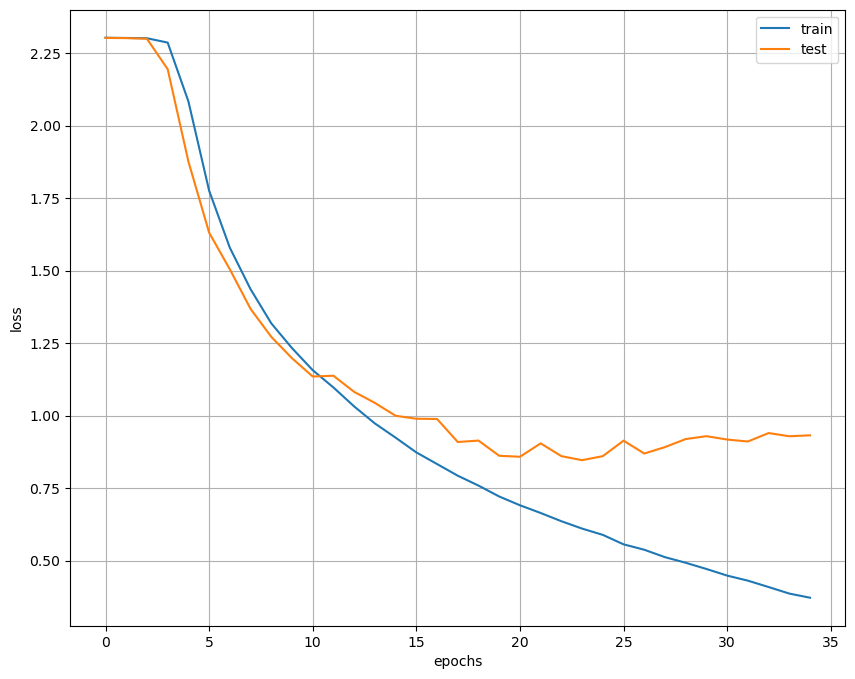

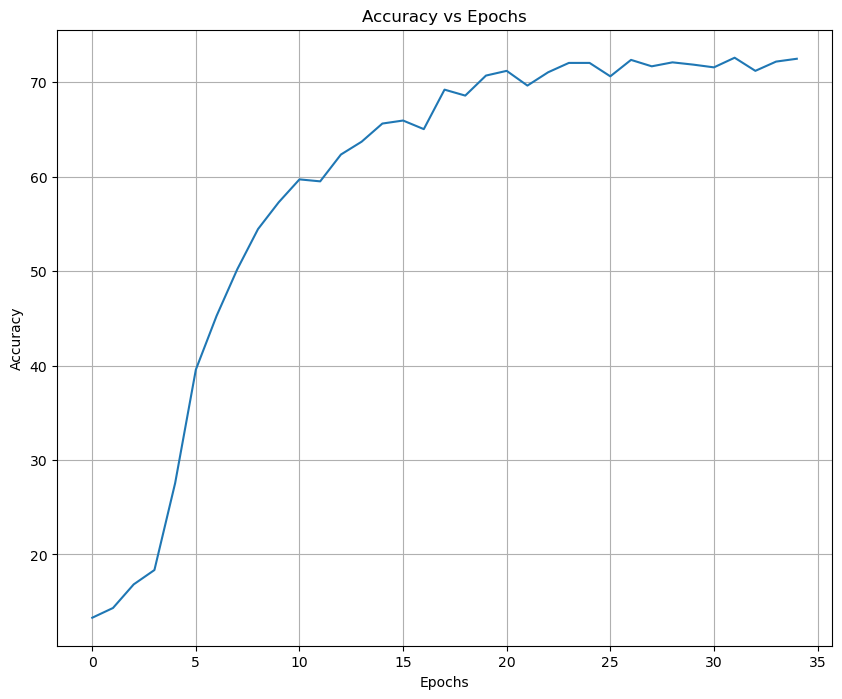

In [11]:
plot_losses(train_loss,test_loss)
plt.figure(figsize=(10,8))
plt.title("Accuracy vs Epochs")
plt.plot(np.arange(len(acc) ),acc) 
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [12]:
np.max(acc)

72.59

We can try to speed up the code with a bigger kernel in the conv2d layers and by removing a linear layer

In [22]:
class Conv3Net3(nn.Module):
    """
    This class defines a simple convolutional neural network (CNN) architecture
    for image classification.

    Attributes:
        conv1 (nn.Conv2d): First convolutional layer with 3 input channels (RGB),
                           6 output channels, and a kernel size of 5x5.
        pool (nn.MaxPool2d): Max pooling layer with a kernel size of 2x2.
        conv2 (nn.Conv2d): Second convolutional layer with 6 input channels
                           (from the first conv layer), 16 output channels,
                           and a kernel size of 5x5.
        fc1 (nn.Linear): First fully-connected layer that flattens the input
                         from the previous convolutional layers and has 120 neurons.
        fc2 (nn.Linear): Second fully-connected layer with 84 neurons.
        fc3 (nn.Linear): Output layer with 10 neurons, corresponding to the 10 classes
                         in CIFAR-10.

    Methods:
        forward(self, x): Defines the forward pass of the network.
    """
    
    
    def __init__(self):
        super(Conv3Net3, self).__init__()  # Call the superclass constructor
        self.conv1 = nn.Conv2d(3, 16, 5)  # First convolutional layer
        self.pool = nn.MaxPool2d(2, 2)  # Max pooling layer
        self.conv2 = nn.Conv2d(16, 32, 3)  # Second convolutional layer
        self.conv3 = nn.Conv2d(32, 32, 3)  # First convolutional layer
  
        self.fc1 = nn.Linear(64 * 2 , 128)  # First fully-connected layer
        #self.fc2 = nn.Linear(128, 96)  # Second fully-connected layer
        self.fc3 = nn.Linear(128, 84)
        self.fc4 = nn.Linear(84, 10)  # Output layer
   
    def forward(self, x):
        """"
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): Input tensor representing the images.

        Returns:
            torch.Tensor: Output tensor representing the class probabilities.
        """
        x = self.pool(F.relu(self.conv1(x)))  # First convolutional layer with ReLU activation and pooling
        x = self.pool(F.relu(self.conv2(x)))  # Second convolutional layer with ReLU activation and pooling
        x = self.pool(F.relu(self.conv3(x)))  # Third convolutional layer with ReLU activation and pooling
        # print(x.shape)
       
        x = x.view(x.shape[0],-1)  # Flatten the output from convolutional layers
        # print(x.shape)
        x = F.gelu(self.fc1(x))  # First fully-connected layer with ReLU activation
       # x = F.gelu(self.fc2(x))  # Second fully-connected layer with ReLU activation
        x = F.gelu(self.fc3(x))
        x = self.fc4(x)  # Output layer
      
        return x
    

In [23]:
# train a net with 
# -optimizer: SGD
# -criterion: CrossEntropyLoss
# -number of epochs: 35
# -learning rate: 0.001
# -momentum : 0.9
net3conv=Conv3Net3()
net3conv.to(device)

net3convkernel,train_loss, test_loss, acc = lib.train_net(Net = net3conv, trainloader = trainloader, testloader = testloader, learning_rate=0.001, epochs = 15, criterion = nn.CrossEntropyLoss())

[epoch: 1] train loss: 2.3026 test loss: 2.2964,test accuracy: 10.2 %
[epoch: 2] train loss: 2.2027 test loss: 1.9705,test accuracy: 27.7 %
[epoch: 3] train loss: 1.8219 test loss: 1.6682,test accuracy: 38.2 %
[epoch: 4] train loss: 1.5958 test loss: 1.4755,test accuracy: 45.9 %
[epoch: 5] train loss: 1.4577 test loss: 1.3822,test accuracy: 49.6 %
[epoch: 6] train loss: 1.3566 test loss: 1.3503,test accuracy: 51.2 %
[epoch: 7] train loss: 1.2624 test loss: 1.2289,test accuracy: 56.0 %
[epoch: 8] train loss: 1.1902 test loss: 1.1910,test accuracy: 57.7 %
[epoch: 9] train loss: 1.1326 test loss: 1.1440,test accuracy: 59.6 %
[epoch: 10] train loss: 1.0748 test loss: 1.0932,test accuracy: 61.5 %
[epoch: 11] train loss: 1.0357 test loss: 1.0480,test accuracy: 63.4 %
[epoch: 12] train loss: 0.9897 test loss: 1.0261,test accuracy: 64.0 %
[epoch: 13] train loss: 0.9591 test loss: 1.0457,test accuracy: 63.8 %
[epoch: 14] train loss: 0.9311 test loss: 0.9780,test accuracy: 66.2 %
[epoch: 15] tra

In [26]:
net3convkernel,train_loss2, test_loss2, acc2 = lib.train_net(Net = net3conv, trainloader = trainloader, testloader = testloader, learning_rate=0.001, epochs = 15, criterion = nn.CrossEntropyLoss())

[epoch: 1] train loss: 0.8630 test loss: 0.9590,test accuracy: 67.2 %
[epoch: 2] train loss: 0.8416 test loss: 0.9400,test accuracy: 68.0 %
[epoch: 3] train loss: 0.8146 test loss: 0.9418,test accuracy: 68.5 %
[epoch: 4] train loss: 0.7914 test loss: 0.9021,test accuracy: 68.9 %
[epoch: 5] train loss: 0.7712 test loss: 0.8822,test accuracy: 69.6 %
[epoch: 6] train loss: 0.7535 test loss: 0.9332,test accuracy: 68.3 %
[epoch: 7] train loss: 0.7416 test loss: 0.9023,test accuracy: 69.3 %
[epoch: 8] train loss: 0.7216 test loss: 0.8654,test accuracy: 70.4 %
[epoch: 9] train loss: 0.7069 test loss: 0.8940,test accuracy: 69.7 %
[epoch: 10] train loss: 0.6928 test loss: 0.8606,test accuracy: 71.1 %
[epoch: 11] train loss: 0.6805 test loss: 0.8674,test accuracy: 71.0 %
[epoch: 12] train loss: 0.6626 test loss: 0.8477,test accuracy: 71.2 %
[epoch: 13] train loss: 0.6485 test loss: 0.8697,test accuracy: 70.5 %
[epoch: 14] train loss: 0.6374 test loss: 0.8752,test accuracy: 71.1 %
[epoch: 15] tra

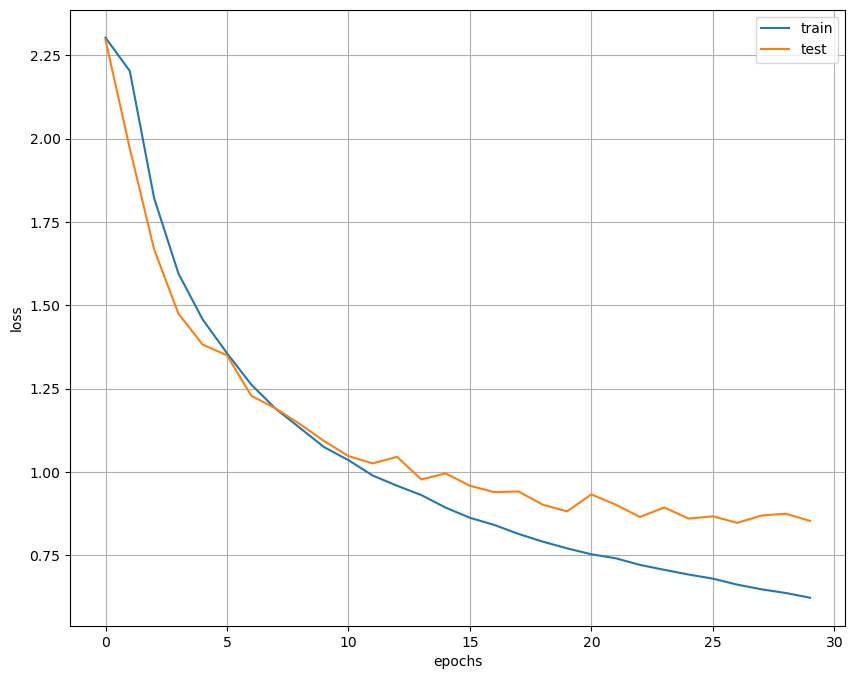

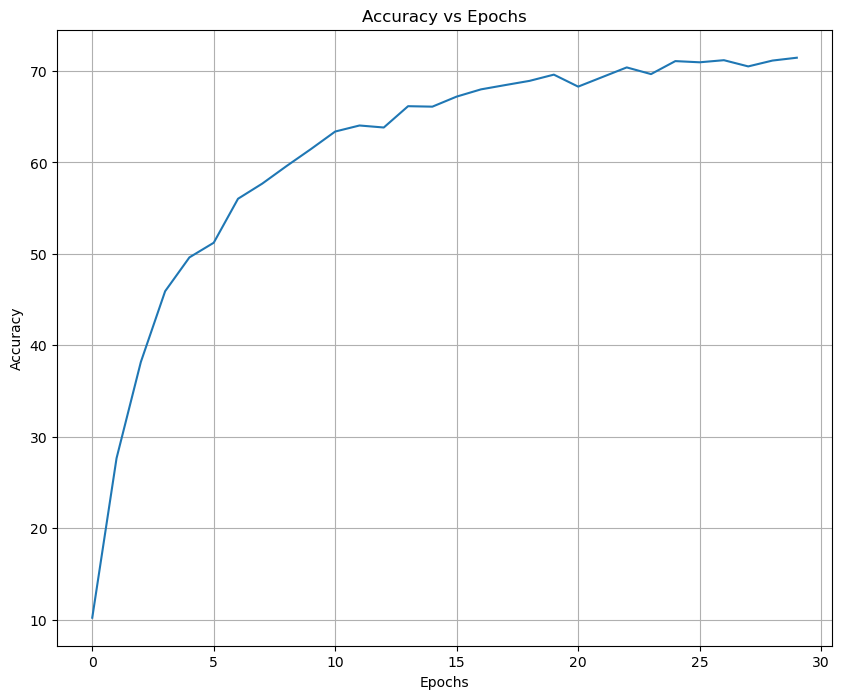

In [32]:
plot_losses(train_loss+ train_loss2,test_loss+test_loss2)
plt.figure(figsize=(10,8))
plt.title("Accuracy vs Epochs")
plt.plot(np.arange(len(acc+acc2) ),acc+acc2) 
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

Not better, try something else

In [29]:
from torchsummary import summary

summary(net3convgelu,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]             896
         MaxPool2d-2           [-1, 32, 15, 15]               0
            Conv2d-3           [-1, 64, 13, 13]          18,496
         MaxPool2d-4             [-1, 64, 6, 6]               0
            Conv2d-5             [-1, 64, 4, 4]          36,928
         MaxPool2d-6             [-1, 64, 2, 2]               0
            Linear-7                  [-1, 128]          32,896
            Linear-8                   [-1, 96]          12,384
            Linear-9                   [-1, 84]           8,148
           Linear-10                   [-1, 10]             850
Total params: 110,598
Trainable params: 110,598
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.39
Params size (MB): 0.42
Estimated T

we should try something different...

In [7]:
class Conv3Net3(nn.Module):
    """
    This class defines a simple convolutional neural network (CNN) architecture
    for image classification.

    Attributes:
        conv1 (nn.Conv2d): First convolutional layer with 3 input channels (RGB),
                           6 output channels, and a kernel size of 5x5.
        pool (nn.MaxPool2d): Max pooling layer with a kernel size of 2x2.
        conv2 (nn.Conv2d): Second convolutional layer with 6 input channels
                           (from the first conv layer), 16 output channels,
                           and a kernel size of 5x5.
        fc1 (nn.Linear): First fully-connected layer that flattens the input
                         from the previous convolutional layers and has 120 neurons.
        fc2 (nn.Linear): Second fully-connected layer with 84 neurons.
        fc3 (nn.Linear): Output layer with 10 neurons, corresponding to the 10 classes
                         in CIFAR-10.

    Methods:
        forward(self, x): Defines the forward pass of the network.
    """
    
    
    def __init__(self):
        super(Conv3Net3, self).__init__()  # Call the superclass constructor
        self.conv1 = nn.Conv2d(3, 6, 3)  # First convolutional layer
        self.pool = nn.MaxPool2d(2, 2)  # Max pooling layer
        self.conv2 = nn.Conv2d(6, 16, 3)  # Second convolutional layer
        self.conv3 = nn.Conv2d(16, 16, 3)  # First convolutional layer
  
        self.fc1 = nn.Linear(64, 128)  # First fully-connected layer
        self.fc2 = nn.Linear(128, 84)  # Second fully-connected layer
       # self.fc3 = nn.Linear(96, 84)
        self.fc4 = nn.Linear(84, 10)  # Output layer
   
    def forward(self, x):
        """"
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): Input tensor representing the images.

        Returns:
            torch.Tensor: Output tensor representing the class probabilities.
        """
        x = self.pool(F.relu(self.conv1(x)))  # First convolutional layer with ReLU activation and pooling
        x = self.pool(F.relu(self.conv2(x)))  # Second convolutional layer with ReLU activation and pooling
        x = self.pool(F.relu(self.conv3(x)))  # Third convolutional layer with ReLU activation and pooling
        # print(x.shape)
       
        x = x.view(x.shape[0],-1)  # Flatten the output from convolutional layers
        # print(x.shape)
        x = F.gelu(self.fc1(x))  # First fully-connected layer with ReLU activation
        x = F.gelu(self.fc2(x))  # Second fully-connected layer with ReLU activation
        #x = F.gelu(self.fc3(x))
        x = self.fc4(x)  # Output layer
      
        return x
    

In [9]:
net3c= Conv3Net3()
net3c.to(device)

net3conv,train_loss, test_loss, acc = lib.train_net(Net = net3c, trainloader = trainloader, testloader = testloader, learning_rate=0.001, epochs = 30, criterion = nn.CrossEntropyLoss())

[epoch: 1] train loss: 2.3020 test loss: 2.2981,test accuracy: 10.3 %
[epoch: 2] train loss: 2.2671 test loss: 2.0619,test accuracy: 24.9 %
[epoch: 3] train loss: 1.9325 test loss: 1.7490,test accuracy: 36.6 %
[epoch: 4] train loss: 1.6848 test loss: 1.6388,test accuracy: 39.6 %
[epoch: 5] train loss: 1.5809 test loss: 1.5470,test accuracy: 42.1 %
[epoch: 6] train loss: 1.5006 test loss: 1.4498,test accuracy: 46.6 %
[epoch: 7] train loss: 1.4401 test loss: 1.4193,test accuracy: 48.0 %
[epoch: 8] train loss: 1.3870 test loss: 1.3672,test accuracy: 50.5 %
[epoch: 9] train loss: 1.3369 test loss: 1.3260,test accuracy: 52.6 %
[epoch: 10] train loss: 1.2998 test loss: 1.2827,test accuracy: 53.9 %
[epoch: 11] train loss: 1.2635 test loss: 1.2636,test accuracy: 54.5 %
[epoch: 12] train loss: 1.2292 test loss: 1.2575,test accuracy: 55.4 %
[epoch: 13] train loss: 1.2030 test loss: 1.2117,test accuracy: 57.1 %
[epoch: 14] train loss: 1.1681 test loss: 1.2024,test accuracy: 57.1 %
[epoch: 15] tra

In [ ]:
net3conv,train_loss2, test_loss2, acc2 = lib.train_net(Net = net3c, trainloader = trainloader, testloader = testloader, learning_rate=0.001, epochs = 15, criterion = nn.CrossEntropyLoss())

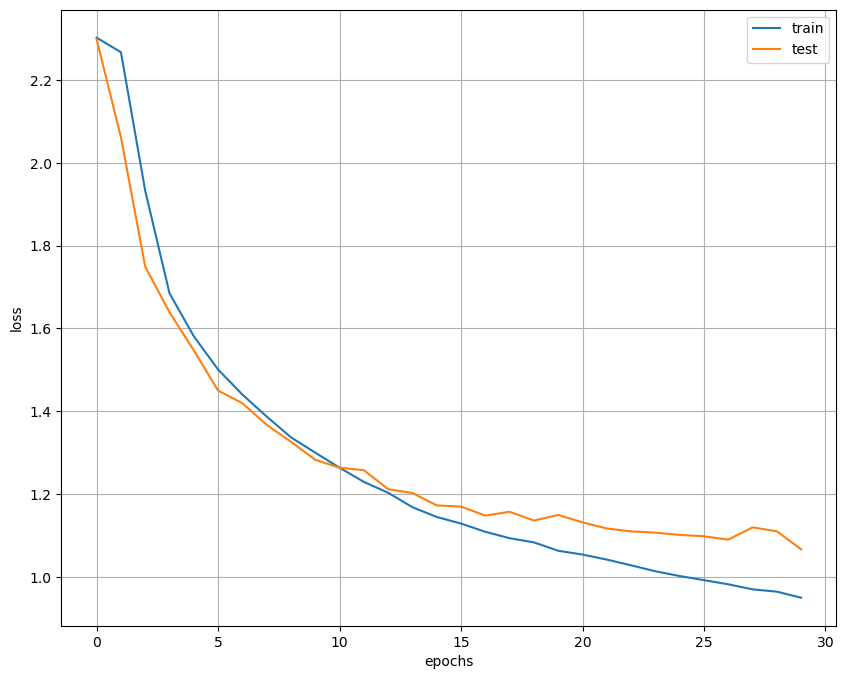

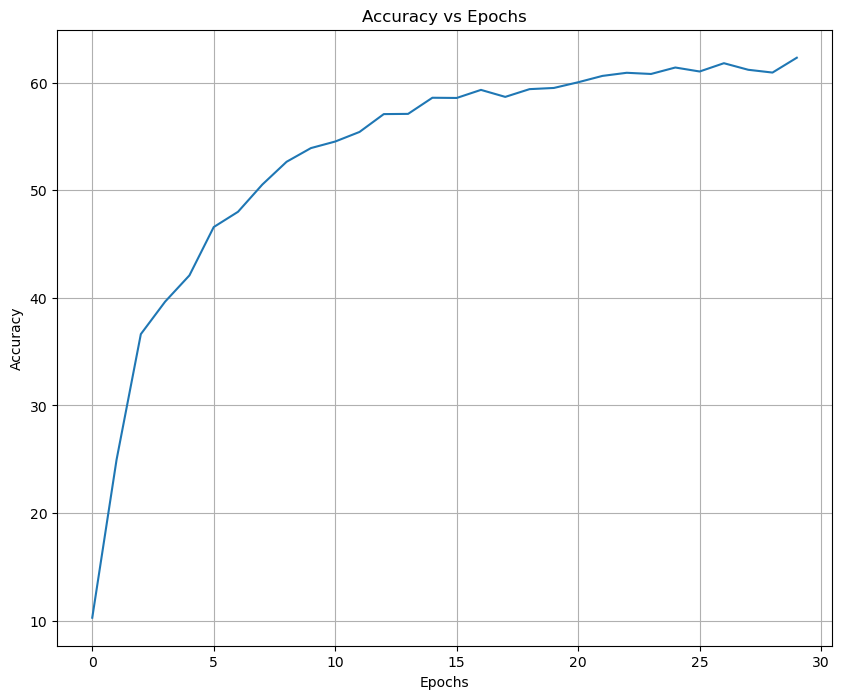

In [11]:
plot_losses(train_loss,test_loss)
plt.figure(figsize=(10,8))
plt.title("Accuracy vs Epochs")
plt.plot(np.arange(len(acc) ),acc) 
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

Leaky relu


In [12]:
class Conv3Net4(nn.Module):
    """
    This class defines a simple convolutional neural network (CNN) architecture
    for image classification.

    Attributes:
        conv1 (nn.Conv2d): First convolutional layer with 3 input channels (RGB),
                           6 output channels, and a kernel size of 5x5.
        pool (nn.MaxPool2d): Max pooling layer with a kernel size of 2x2.
        conv2 (nn.Conv2d): Second convolutional layer with 6 input channels
                           (from the first conv layer), 16 output channels,
                           and a kernel size of 5x5.
        fc1 (nn.Linear): First fully-connected layer that flattens the input
                         from the previous convolutional layers and has 120 neurons.
        fc2 (nn.Linear): Second fully-connected layer with 84 neurons.
        fc3 (nn.Linear): Output layer with 10 neurons, corresponding to the 10 classes
                         in CIFAR-10.

    Methods:
        forward(self, x): Defines the forward pass of the network.
    """
    
    
    def __init__(self):
        super(Conv3Net4, self).__init__()  # Call the superclass constructor
        self.conv1 = nn.Conv2d(3, 32, 3)  # First convolutional layer
        self.pool = nn.MaxPool2d(2, 2)  # Max pooling layer
        self.conv2 = nn.Conv2d(32, 64, 3)  # Second convolutional layer
        self.conv3 = nn.Conv2d(64, 64, 3)  # First convolutional layer
  
        self.fc1 = nn.Linear(64 * 2 * 2, 128)  # First fully-connected layer
        self.fc2 = nn.Linear(128, 96)  # Second fully-connected layer
        self.fc3 = nn.Linear(96, 84)
        self.fc4 = nn.Linear(84, 10)  # Output layer
   
    def forward(self, x):
        """"
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): Input tensor representing the images.

        Returns:
            torch.Tensor: Output tensor representing the class probabilities.
        """
        x = self.pool(F.relu(self.conv1(x)))  # First convolutional layer with ReLU activation and pooling
        x = self.pool(F.relu(self.conv2(x)))  # Second convolutional layer with ReLU activation and pooling
        x = self.pool(F.relu(self.conv3(x)))  # Third convolutional layer with ReLU activation and pooling
        # print(x.shape)
       
        x = x.view(x.shape[0],-1)  # Flatten the output from convolutional layers
        # print(x.shape)
        x = F.leaky_relu_(self.fc1(x))  # First fully-connected layer with ReLU activation
        x = F.leaky_relu_(self.fc2(x))  # Second fully-connected layer with ReLU activation
        x = F.leaky_relu_(self.fc3(x))
        x = self.fc4(x)  # Output layer
      
        return x
    

In [13]:
netleak= Conv3Net4()
netleak.to(device)

net3leak,train_loss, test_loss, acc = lib.train_net(Net = netleak, trainloader = trainloader, testloader = testloader, learning_rate=0.001, epochs = 30, criterion = nn.CrossEntropyLoss())

[epoch: 1] train loss: 2.3016 test loss: 2.2957,test accuracy: 16.6 %
[epoch: 2] train loss: 2.2658 test loss: 2.0580,test accuracy: 22.2 %
[epoch: 3] train loss: 1.9340 test loss: 1.7656,test accuracy: 33.1 %
[epoch: 4] train loss: 1.7095 test loss: 1.6130,test accuracy: 40.0 %
[epoch: 5] train loss: 1.5727 test loss: 1.4944,test accuracy: 44.4 %
[epoch: 6] train loss: 1.4316 test loss: 1.4000,test accuracy: 48.4 %
[epoch: 7] train loss: 1.3221 test loss: 1.2627,test accuracy: 54.5 %
[epoch: 8] train loss: 1.2310 test loss: 1.1909,test accuracy: 56.8 %
[epoch: 9] train loss: 1.1503 test loss: 1.1635,test accuracy: 57.8 %
[epoch: 10] train loss: 1.0774 test loss: 1.0686,test accuracy: 62.3 %
[epoch: 11] train loss: 1.0141 test loss: 1.0700,test accuracy: 62.2 %
[epoch: 12] train loss: 0.9593 test loss: 1.0380,test accuracy: 63.6 %
[epoch: 13] train loss: 0.9089 test loss: 0.9402,test accuracy: 67.0 %
[epoch: 14] train loss: 0.8623 test loss: 0.9407,test accuracy: 67.3 %
[epoch: 15] tra

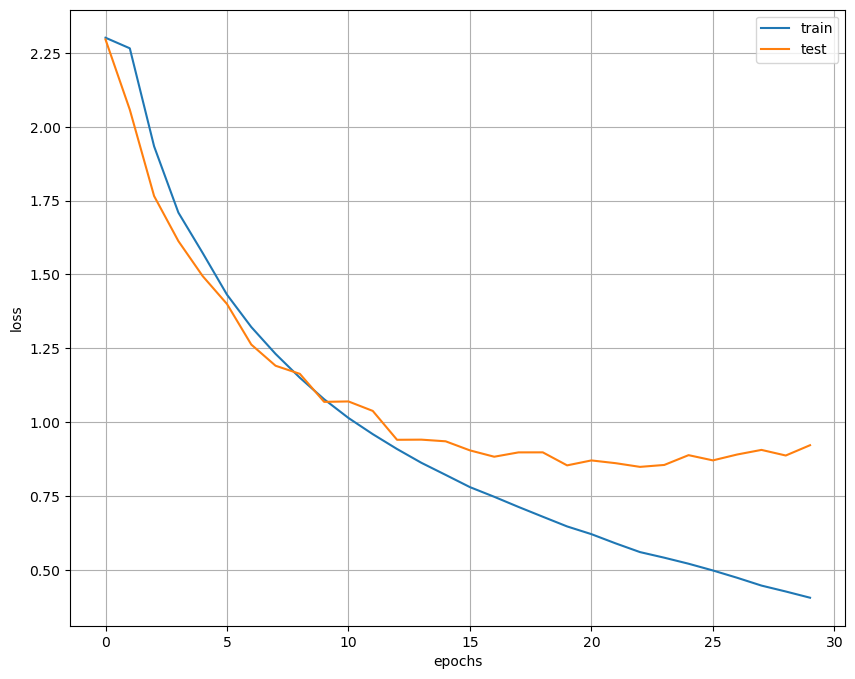

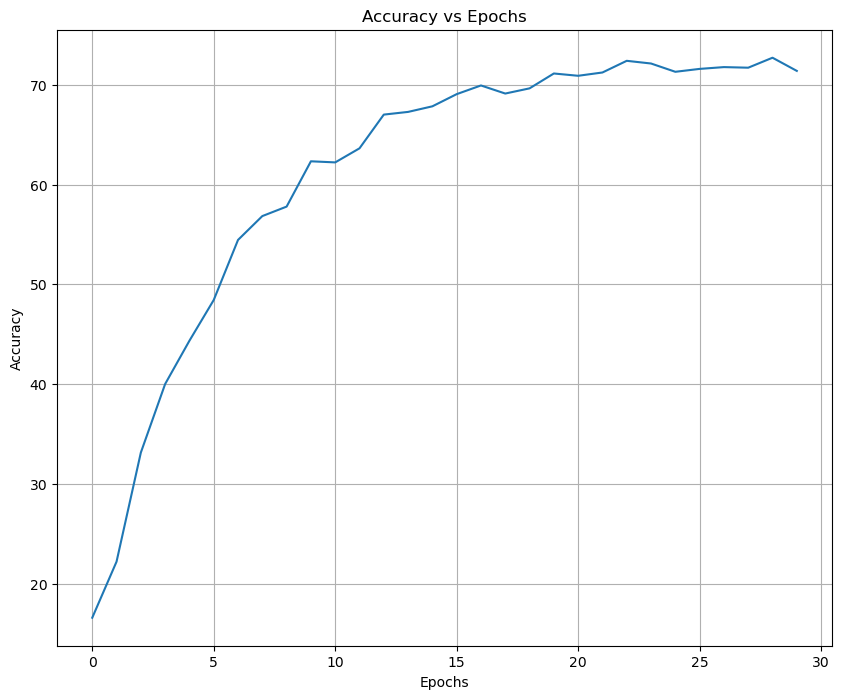

In [14]:
plot_losses(train_loss,test_loss)
plt.figure(figsize=(10,8))
plt.title("Accuracy vs Epochs")
plt.plot(np.arange(len(acc) ),acc) 
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [15]:
np.max(acc)

72.71

In [22]:
summary(net3leak,(3,32,32) )

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]             896
         MaxPool2d-2           [-1, 32, 15, 15]               0
            Conv2d-3           [-1, 64, 13, 13]          18,496
         MaxPool2d-4             [-1, 64, 6, 6]               0
            Conv2d-5             [-1, 64, 4, 4]          36,928
         MaxPool2d-6             [-1, 64, 2, 2]               0
            Linear-7                  [-1, 128]          32,896
            Linear-8                   [-1, 96]          12,384
            Linear-9                   [-1, 84]           8,148
           Linear-10                   [-1, 10]             850
Total params: 110,598
Trainable params: 110,598
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.39
Params size (MB): 0.42
Estimated T

In [6]:
class Conv3Net5(nn.Module):
    """
    This class defines a simple convolutional neural network (CNN) architecture
    for image classification.

    Attributes:
        conv1 (nn.Conv2d): First convolutional layer with 3 input channels (RGB),
                           6 output channels, and a kernel size of 5x5.
        pool (nn.MaxPool2d): Max pooling layer with a kernel size of 2x2.
        conv2 (nn.Conv2d): Second convolutional layer with 6 input channels
                           (from the first conv layer), 16 output channels,
                           and a kernel size of 5x5.
        fc1 (nn.Linear): First fully-connected layer that flattens the input
                         from the previous convolutional layers and has 120 neurons.
        fc2 (nn.Linear): Second fully-connected layer with 84 neurons.
        fc3 (nn.Linear): Output layer with 10 neurons, corresponding to the 10 classes
                         in CIFAR-10.

    Methods:
        forward(self, x): Defines the forward pass of the network.
    """
    
    
    def __init__(self):
        super(Conv3Net5, self).__init__()  # Call the superclass constructor
        self.conv1 = nn.Conv2d(3, 16, 3)  # First convolutional layer
        self.pool = nn.MaxPool2d(2, 2)  # Max pooling layer
        self.conv2 = nn.Conv2d(16, 64, 3)  # Second convolutional layer
        self.conv3 = nn.Conv2d(64, 32, 3)  # First convolutional layer
  
        self.fc1 = nn.Linear(32 * 2 * 2 , 128)  # First fully-connected layer
        self.fc2 = nn.Linear(128, 64)  # Second fully-connected layer
        #self.fc3 = nn.Linear(64, 90)
        self.fc4 = nn.Linear(64, 10)  # Output layer
   
    def forward(self, x):
        """"
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): Input tensor representing the images.

        Returns:
            torch.Tensor: Output tensor representing the class probabilities.
        """
        x = self.pool(F.relu(self.conv1(x)))  # First convolutional layer with ReLU activation and pooling
        x = self.pool(F.relu(self.conv2(x)))  # Second convolutional layer with ReLU activation and pooling
        x = self.pool(F.relu(self.conv3(x)))  # Third convolutional layer with ReLU activation and pooling
        # print(x.shape)
       
        x = x.view(x.shape[0],-1)  # Flatten the output from convolutional layers
        # print(x.shape)
        x = F.leaky_relu_(self.fc1(x),0.01)  # First fully-connected layer with ReLU activation
        x = F.leaky_relu_(self.fc2(x),0.01)  # Second fully-connected layer with ReLU activation
        #x = F.leaky_relu_(self.fc3(x))
        x = self.fc4(x)  # Output layer
      
        return x
    

In [33]:
convstrange =  Conv3Net5()
convstrange.to(device)

summary(convstrange,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             448
         MaxPool2d-2           [-1, 16, 15, 15]               0
            Conv2d-3           [-1, 64, 13, 13]           9,280
         MaxPool2d-4             [-1, 64, 6, 6]               0
            Conv2d-5             [-1, 32, 4, 4]          18,464
         MaxPool2d-6             [-1, 32, 2, 2]               0
            Linear-7                  [-1, 128]          16,512
            Linear-8                   [-1, 64]           8,256
            Linear-9                   [-1, 10]             650
Total params: 53,610
Trainable params: 53,610
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.24
Params size (MB): 0.20
Estimated Total Size (MB): 0.46
---------------------------------------------

In [34]:
netstrange,train_loss, test_loss, acc = lib.train_net(Net = convstrange, trainloader = trainloader, testloader = testloader, learning_rate=0.001, epochs = 15, criterion = nn.CrossEntropyLoss())


[epoch: 1] train loss: 2.2871 test loss: 2.1274,test accuracy: 22.4 %
[epoch: 2] train loss: 1.9778 test loss: 1.7659,test accuracy: 33.6 %
[epoch: 3] train loss: 1.6880 test loss: 1.5811,test accuracy: 42.2 %
[epoch: 4] train loss: 1.5369 test loss: 1.4456,test accuracy: 47.0 %
[epoch: 5] train loss: 1.4232 test loss: 1.3527,test accuracy: 51.5 %
[epoch: 6] train loss: 1.3330 test loss: 1.2857,test accuracy: 54.0 %
[epoch: 7] train loss: 1.2590 test loss: 1.2811,test accuracy: 55.6 %
[epoch: 8] train loss: 1.1965 test loss: 1.1803,test accuracy: 58.3 %
[epoch: 9] train loss: 1.1360 test loss: 1.1235,test accuracy: 60.3 %
[epoch: 10] train loss: 1.0797 test loss: 1.0988,test accuracy: 61.0 %
[epoch: 11] train loss: 1.0349 test loss: 1.0942,test accuracy: 61.3 %
[epoch: 12] train loss: 0.9902 test loss: 1.0435,test accuracy: 63.2 %
[epoch: 13] train loss: 0.9544 test loss: 1.0006,test accuracy: 65.0 %
[epoch: 14] train loss: 0.9181 test loss: 0.9773,test accuracy: 66.2 %
[epoch: 15] tra

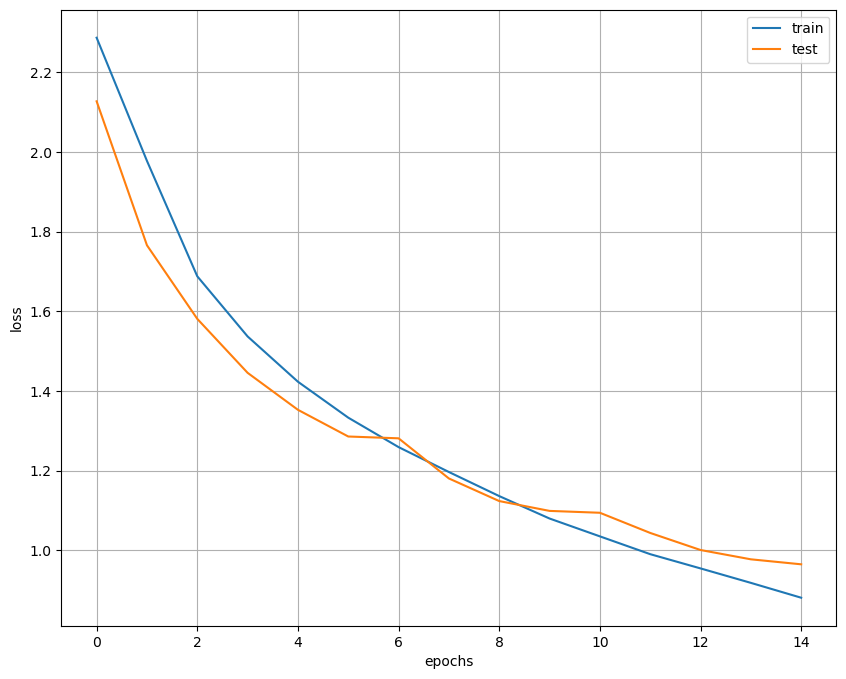

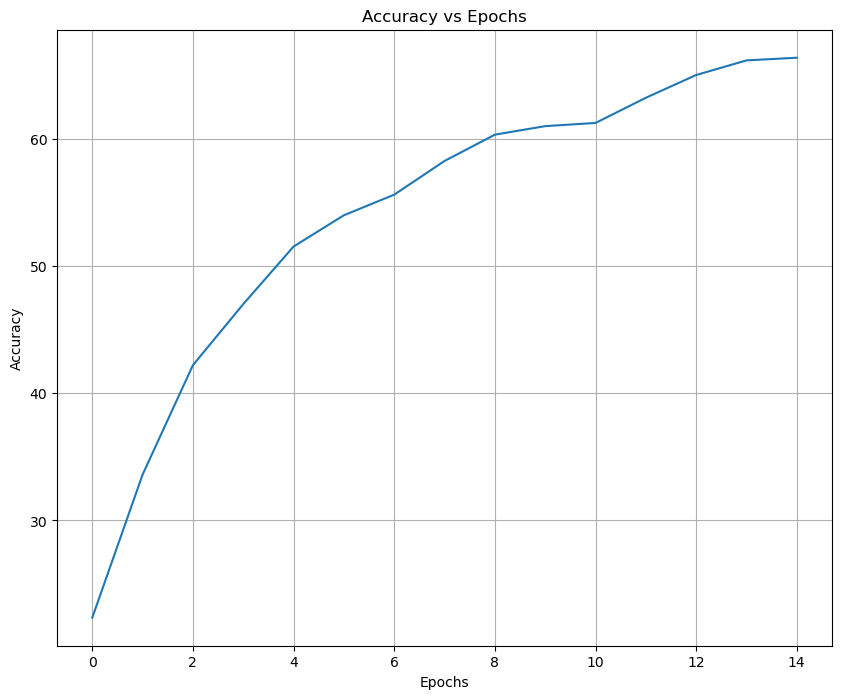

In [35]:
plot_losses(train_loss,test_loss)
plt.figure(figsize=(10,8))
plt.title("Accuracy vs Epochs")
plt.plot(np.arange(len(acc) ),acc) 
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [36]:
torch.save(netstrange, "netstrange.pth")

In [7]:
netstrange = torch.load("netstrange.pth")

In [9]:
summary(netstrange,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             448
         MaxPool2d-2           [-1, 16, 15, 15]               0
            Conv2d-3           [-1, 64, 13, 13]           9,280
         MaxPool2d-4             [-1, 64, 6, 6]               0
            Conv2d-5             [-1, 32, 4, 4]          18,464
         MaxPool2d-6             [-1, 32, 2, 2]               0
            Linear-7                  [-1, 128]          16,512
            Linear-8                   [-1, 64]           8,256
            Linear-9                   [-1, 10]             650
Total params: 53,610
Trainable params: 53,610
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.24
Params size (MB): 0.20
Estimated Total Size (MB): 0.46
---------------------------------------------

In [11]:
netstrange.to(device)
netstrange,train_loss, test_loss, acc = lib.train_net(Net = netstrange, trainloader = trainloader, testloader = testloader, learning_rate=0.001, epochs = 15, criterion = nn.CrossEntropyLoss())


[epoch: 1] train loss: 0.8529 test loss: 0.9606,test accuracy: 67.2 %
[epoch: 2] train loss: 0.8239 test loss: 0.9681,test accuracy: 67.0 %
[epoch: 3] train loss: 0.7996 test loss: 0.9322,test accuracy: 67.6 %
[epoch: 4] train loss: 0.7773 test loss: 0.9001,test accuracy: 69.1 %
[epoch: 5] train loss: 0.7543 test loss: 0.9281,test accuracy: 68.3 %
[epoch: 6] train loss: 0.7243 test loss: 0.9055,test accuracy: 69.2 %
[epoch: 7] train loss: 0.7141 test loss: 0.9332,test accuracy: 68.5 %
[epoch: 8] train loss: 0.6894 test loss: 0.8939,test accuracy: 70.3 %
[epoch: 9] train loss: 0.6715 test loss: 0.8822,test accuracy: 70.7 %
[epoch: 10] train loss: 0.6538 test loss: 0.8840,test accuracy: 70.6 %
[epoch: 11] train loss: 0.6375 test loss: 0.8794,test accuracy: 70.3 %
[epoch: 12] train loss: 0.6180 test loss: 0.8991,test accuracy: 70.5 %
[epoch: 13] train loss: 0.6004 test loss: 0.8876,test accuracy: 70.4 %
[epoch: 14] train loss: 0.5882 test loss: 0.9414,test accuracy: 69.8 %
[epoch: 15] tra

In [13]:
netstrange,train_loss2, test_loss2, acc2 = lib.train_net(Net = netstrange, trainloader = trainloader, testloader = testloader, learning_rate=0.001, epochs = 15, criterion = nn.CrossEntropyLoss())


[epoch: 1] train loss: 0.5574 test loss: 0.9029,test accuracy: 70.9 %
[epoch: 2] train loss: 0.5402 test loss: 0.9105,test accuracy: 71.0 %
[epoch: 3] train loss: 0.5270 test loss: 0.9316,test accuracy: 70.9 %
[epoch: 4] train loss: 0.5130 test loss: 0.9010,test accuracy: 71.1 %
[epoch: 5] train loss: 0.5017 test loss: 0.9464,test accuracy: 70.7 %
[epoch: 6] train loss: 0.4888 test loss: 0.9657,test accuracy: 70.8 %
[epoch: 7] train loss: 0.4756 test loss: 0.9759,test accuracy: 70.0 %
[epoch: 8] train loss: 0.4672 test loss: 1.0044,test accuracy: 69.9 %
[epoch: 9] train loss: 0.4551 test loss: 0.9820,test accuracy: 70.5 %
[epoch: 10] train loss: 0.4433 test loss: 0.9687,test accuracy: 70.4 %


KeyboardInterrupt: 

In [15]:
class Conv3DropNet(nn.Module):
    """
    This class defines a simple convolutional neural network (CNN) architecture
    for image classification.

    Attributes:
        conv1 (nn.Conv2d): First convolutional layer with 3 input channels (RGB),
                           6 output channels, and a kernel size of 5x5.
        pool (nn.MaxPool2d): Max pooling layer with a kernel size of 2x2.
        conv2 (nn.Conv2d): Second convolutional layer with 6 input channels
                           (from the first conv layer), 16 output channels,
                           and a kernel size of 5x5.
        fc1 (nn.Linear): First fully-connected layer that flattens the input
                         from the previous convolutional layers and has 120 neurons.
        fc2 (nn.Linear): Second fully-connected layer with 84 neurons.
        fc3 (nn.Linear): Output layer with 10 neurons, corresponding to the 10 classes
                         in CIFAR-10.

    Methods:
        forward(self, x): Defines the forward pass of the network.
    """
    
    
    def __init__(self):
        super(Conv3DropNet, self).__init__()  # Call the superclass constructor
        self.conv1 = nn.Conv2d(3, 32, 3)  # First convolutional layer
        self.pool = nn.MaxPool2d(2, 2)  # Max pooling layer
        self.conv2 = nn.Conv2d(32, 64, 3)  # Second convolutional layer
        self.conv3 = nn.Conv2d(64, 64, 3)  # First convolutional layer
        
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.25)
  
        self.fc1 = nn.Linear(64 * 2 * 2, 128)  # First fully-connected layer
        self.fc2 = nn.Linear(128, 96)  # Second fully-connected layer
        self.fc3 = nn.Linear(96, 84)
        self.fc4 = nn.Linear(84, 10)  # Output layer
   
    def forward(self, x):
        """"
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): Input tensor representing the images.

        Returns:
            torch.Tensor: Output tensor representing the class probabilities.
        """
        x = self.pool(F.relu(self.conv1(x)))  # First convolutional layer with ReLU activation and pooling
        x = self.dropout1(x)
        x = self.pool(F.relu(self.conv2(x)))  # Second convolutional layer with ReLU activation and pooling
        x = self.dropout2(x)
        x = self.pool(F.relu(self.conv3(x)))  # Third convolutional layer with ReLU activation and pooling
      
        # print(x.shape)
       
        x = x.view(x.shape[0],-1)  # Flatten the output from convolutional layers
        # print(x.shape)
        x = F.leaky_relu_(self.fc1(x))  # First fully-connected layer with ReLU activation
        x = F.leaky_relu_(self.fc2(x))  # Second fully-connected layer with ReLU activation
        x = F.leaky_relu_(self.fc3(x))
        x = self.fc4(x)  # Output layer
      
        return x
    

In [17]:
netDrop = Conv3DropNet()
netDrop.to(device)

summary(netDrop,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]             896
         MaxPool2d-2           [-1, 32, 15, 15]               0
           Dropout-3           [-1, 32, 15, 15]               0
            Conv2d-4           [-1, 64, 13, 13]          18,496
         MaxPool2d-5             [-1, 64, 6, 6]               0
           Dropout-6             [-1, 64, 6, 6]               0
            Conv2d-7             [-1, 64, 4, 4]          36,928
         MaxPool2d-8             [-1, 64, 2, 2]               0
            Linear-9                  [-1, 128]          32,896
           Linear-10                   [-1, 96]          12,384
           Linear-11                   [-1, 84]           8,148
           Linear-12                   [-1, 10]             850
Total params: 110,598
Trainable params: 110,598
Non-trainable params: 0
-------------------------------

In [18]:
dropnet,train_loss, test_loss, acc = lib.train_net(Net = netDrop, trainloader = trainloader, testloader = testloader, learning_rate=0.001, epochs = 15, criterion = nn.CrossEntropyLoss())


[epoch: 1] train loss: 2.3023 test loss: 2.2963,test accuracy: 19.1 %
[epoch: 2] train loss: 2.2454 test loss: 2.0459,test accuracy: 22.9 %
[epoch: 3] train loss: 1.9699 test loss: 1.7904,test accuracy: 32.4 %
[epoch: 4] train loss: 1.7525 test loss: 1.7006,test accuracy: 36.3 %
[epoch: 5] train loss: 1.6218 test loss: 1.5537,test accuracy: 43.0 %
[epoch: 6] train loss: 1.5136 test loss: 1.4426,test accuracy: 46.9 %
[epoch: 7] train loss: 1.4167 test loss: 1.3653,test accuracy: 50.0 %
[epoch: 8] train loss: 1.3378 test loss: 1.3032,test accuracy: 52.7 %
[epoch: 9] train loss: 1.2744 test loss: 1.2516,test accuracy: 54.9 %
[epoch: 10] train loss: 1.2157 test loss: 1.2029,test accuracy: 56.9 %
[epoch: 11] train loss: 1.1634 test loss: 1.1579,test accuracy: 58.5 %
[epoch: 12] train loss: 1.1101 test loss: 1.1257,test accuracy: 60.0 %
[epoch: 13] train loss: 1.0761 test loss: 1.0865,test accuracy: 61.3 %
[epoch: 14] train loss: 1.0335 test loss: 1.0740,test accuracy: 62.2 %
[epoch: 15] tra

In [20]:
dropnet,train_loss2, test_loss2, acc2 = lib.train_net(Net = netDrop, trainloader = trainloader, testloader = testloader, learning_rate=0.001, epochs = 5, criterion = nn.CrossEntropyLoss())


[epoch: 1] train loss: 0.9550 test loss: 0.9798,test accuracy: 65.3 %
[epoch: 2] train loss: 0.9254 test loss: 0.9689,test accuracy: 65.9 %
[epoch: 3] train loss: 0.9051 test loss: 0.9450,test accuracy: 66.7 %
[epoch: 4] train loss: 0.8765 test loss: 0.9240,test accuracy: 67.8 %
[epoch: 5] train loss: 0.8501 test loss: 0.9102,test accuracy: 67.9 %
Finished Training


In [21]:
dropnet3,train_loss3, test_loss3, acc3 = lib.train_net(Net = netDrop, trainloader = trainloader, testloader = testloader, learning_rate=0.001, epochs = 5, criterion = nn.CrossEntropyLoss())


[epoch: 1] train loss: 0.8341 test loss: 0.9286,test accuracy: 67.4 %
[epoch: 2] train loss: 0.8102 test loss: 0.8768,test accuracy: 69.7 %
[epoch: 3] train loss: 0.7917 test loss: 0.8706,test accuracy: 69.4 %
[epoch: 4] train loss: 0.7741 test loss: 0.8634,test accuracy: 69.8 %
[epoch: 5] train loss: 0.7600 test loss: 0.8590,test accuracy: 69.8 %
Finished Training


In [22]:
dropnet4,train_loss4, test_loss4, acc4 = lib.train_net(Net = netDrop, trainloader = trainloader, testloader = testloader, learning_rate=0.001, epochs = 5, criterion = nn.CrossEntropyLoss())

[epoch: 1] train loss: 0.7452 test loss: 0.8643,test accuracy: 70.3 %
[epoch: 2] train loss: 0.7305 test loss: 0.8461,test accuracy: 70.9 %
[epoch: 3] train loss: 0.7189 test loss: 0.8314,test accuracy: 71.2 %
[epoch: 4] train loss: 0.7027 test loss: 0.8325,test accuracy: 71.8 %
[epoch: 5] train loss: 0.6916 test loss: 0.8306,test accuracy: 71.5 %
Finished Training


use a lower learning rate now

In [23]:
dropnet5,train_loss5, test_loss5, acc5 = lib.train_net(Net = netDrop, trainloader = trainloader, testloader = testloader, learning_rate=0.0005, epochs = 5, criterion = nn.CrossEntropyLoss())

[epoch: 1] train loss: 0.6553 test loss: 0.8185,test accuracy: 72.2 %
[epoch: 2] train loss: 0.6508 test loss: 0.8040,test accuracy: 72.5 %
[epoch: 3] train loss: 0.6386 test loss: 0.7920,test accuracy: 72.8 %
[epoch: 4] train loss: 0.6328 test loss: 0.7980,test accuracy: 72.8 %
[epoch: 5] train loss: 0.6297 test loss: 0.8018,test accuracy: 72.5 %
Finished Training


In [24]:
dropnet6,train_loss6, test_loss6, acc6 = lib.train_net(Net = netDrop, trainloader = trainloader, testloader = testloader, learning_rate=0.0001, epochs = 5, criterion = nn.CrossEntropyLoss())

[epoch: 1] train loss: 0.6008 test loss: 0.7741,test accuracy: 73.7 %
[epoch: 2] train loss: 0.5948 test loss: 0.7810,test accuracy: 73.6 %
[epoch: 3] train loss: 0.5976 test loss: 0.7806,test accuracy: 73.0 %
[epoch: 4] train loss: 0.5935 test loss: 0.7892,test accuracy: 73.2 %
[epoch: 5] train loss: 0.5928 test loss: 0.7769,test accuracy: 73.7 %
Finished Training


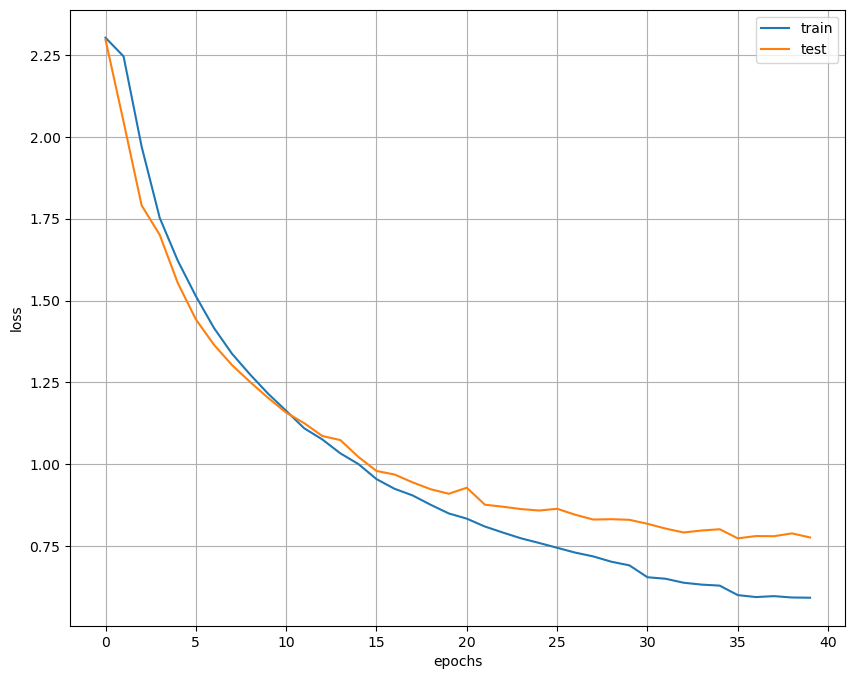

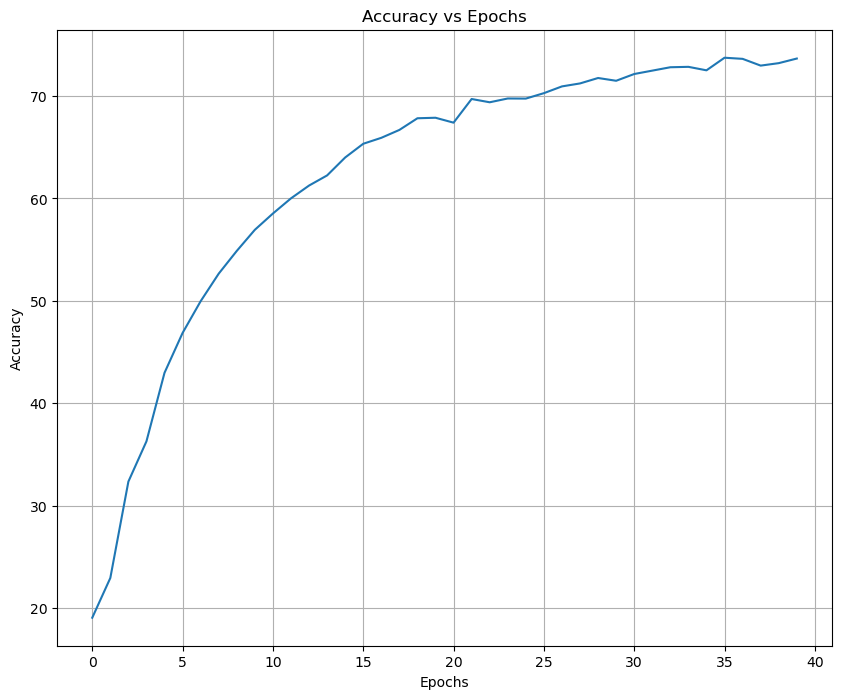

In [25]:
tsl = test_loss + test_loss2 + test_loss3 + test_loss4 + test_loss5 +test_loss6
trl = train_loss + train_loss2 + train_loss3 + train_loss4 + train_loss5 + train_loss6
accl = acc + acc2 +acc3 +acc4 +acc5 +acc6 

plot_losses(trl,tsl)
plt.figure(figsize=(10,8))
plt.title("Accuracy vs Epochs")
plt.plot(np.arange(len(accl) ),accl) 
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()


In [26]:
dropnet7,train_loss7, test_loss7, acc7 = lib.train_net(Net = netDrop, trainloader = trainloader, testloader = testloader, learning_rate=0.0001, epochs = 5, criterion = nn.CrossEntropyLoss())

[epoch: 1] train loss: 0.5917 test loss: 0.7780,test accuracy: 73.4 %
[epoch: 2] train loss: 0.5895 test loss: 0.7655,test accuracy: 73.4 %
[epoch: 3] train loss: 0.5848 test loss: 0.7737,test accuracy: 73.5 %
[epoch: 4] train loss: 0.5844 test loss: 0.7768,test accuracy: 73.7 %
[epoch: 5] train loss: 0.5832 test loss: 0.7747,test accuracy: 74.0 %
Finished Training


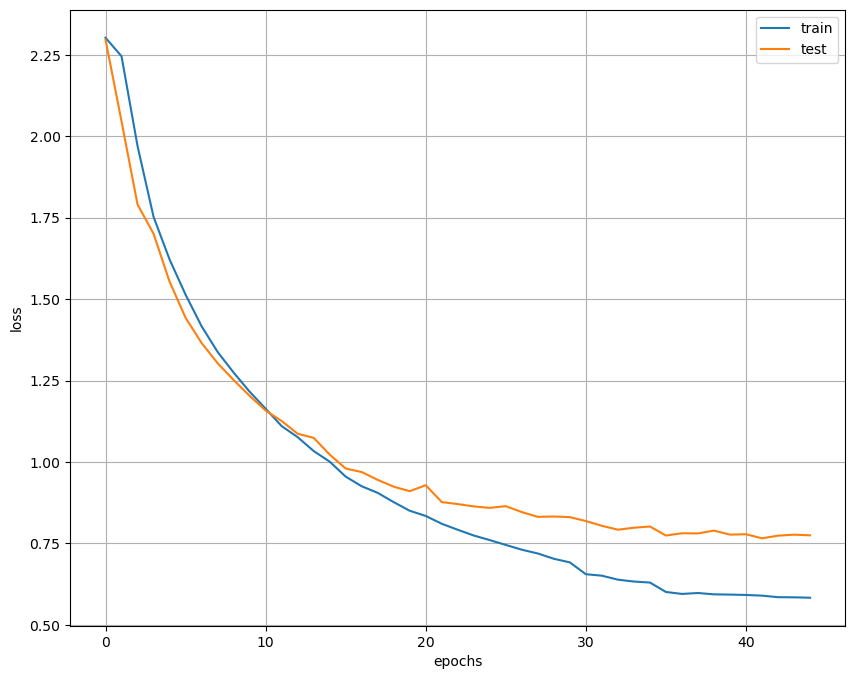

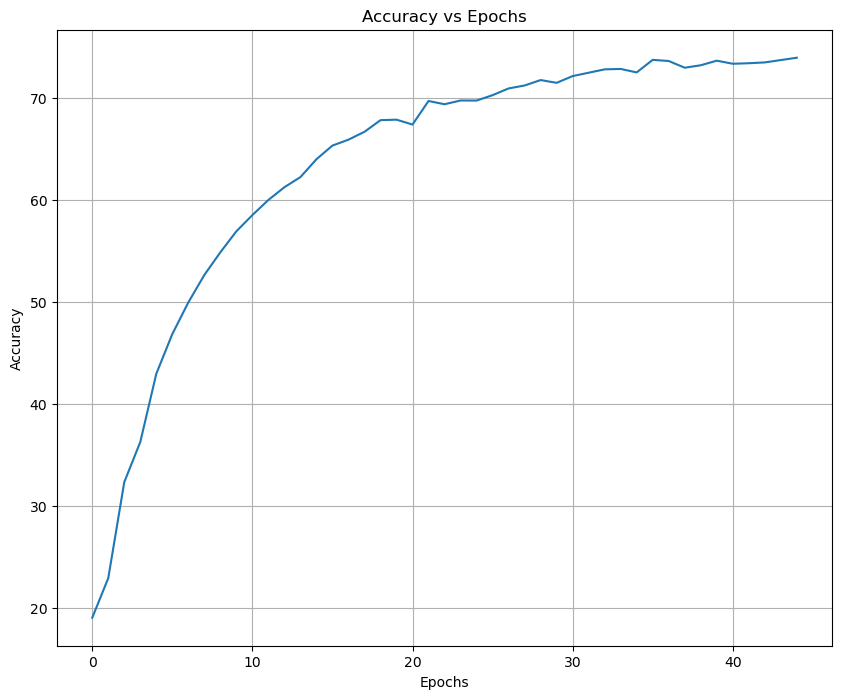

In [30]:
tsl = test_loss + test_loss2 + test_loss3 + test_loss4 + test_loss5 +test_loss6 + test_loss7
trl = train_loss + train_loss2 + train_loss3 + train_loss4 + train_loss5 + train_loss6 + train_loss7
accl = acc + acc2 +acc3 +acc4 +acc5 +acc6 + acc7

plot_losses(trl,tsl)
plt.figure(figsize=(10,8))
plt.title("Accuracy vs Epochs")
plt.plot(np.arange(len(accl) ),accl) 
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()


In [52]:
class Conv5Net(nn.Module):
    """
    This class defines a simple convolutional neural network (CNN) architecture
    for image classification.

    Attributes:
        conv1 (nn.Conv2d): First convolutional layer with 3 input channels (RGB),
                           6 output channels, and a kernel size of 5x5.
        pool (nn.MaxPool2d): Max pooling layer with a kernel size of 2x2.
        conv2 (nn.Conv2d): Second convolutional layer with 6 input channels
                           (from the first conv layer), 16 output channels,
                           and a kernel size of 5x5.
        fc1 (nn.Linear): First fully-connected layer that flattens the input
                         from the previous convolutional layers and has 120 neurons.
        fc2 (nn.Linear): Second fully-connected layer with 84 neurons.
        fc3 (nn.Linear): Output layer with 10 neurons, corresponding to the 10 classes
                         in CIFAR-10.

    Methods:
        forward(self, x): Defines the forward pass of the network.
    """
    
    
    def __init__(self):
        super(Conv5Net, self).__init__()  # Call the superclass constructor
        self.conv1 = nn.Conv2d(3, 32, 3)  # First convolutional layer
        self.pool = nn.MaxPool2d(2, 2)  # Max pooling layer
        self.conv2 = nn.Conv2d(32, 64, 3)  # Second convolutional layer
        self.conv3 = nn.Conv2d(64, 128, 3)  # First convolutional layer
        self.conv4 = nn.Conv2d(128, 256, 3)  # Second convolutional layer
        self.conv5 = nn.Conv2d(256, 256, 3)  # First convolutional layer
        
        self.dropout = nn.Dropout(0.25)
  
        self.fc1 = nn.Linear(256, 512)  # First fully-connected layer
        self.fc2 = nn.Linear(512, 128)  # Second fully-connected layer
        self.fc3 = nn.Linear(128, 84)
        self.fc4 = nn.Linear(84, 10)  # Output layer
   
    def forward(self, x):
        """"
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): Input tensor representing the images.

        Returns:
            torch.Tensor: Output tensor representing the class probabilities.
        """
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = self.pool(F.relu(self.conv3(x)))  # First convolutional layer with ReLU activation and pooling
        x = F.relu(self.conv4(x))
        x = self.pool(F.relu(self.conv5(x)))  # Second convolutional layer with ReLU activation and pooling
        
        # print(x.shape)
       
        x = x.view(x.shape[0],-1)  # Flatten the output from convolutional layers
        # print(x.shape)
        x = F.gelu(self.fc1(x))  # First fully-connected layer with ReLU activation
        x = self.dropout(x)
        x = F.gelu(self.fc2(x))  # Second fully-connected layer with ReLU activation
        x = self.dropout(x)
        x = F.gelu(self.fc3(x))
        x = self.fc4(x)  # Output layer
      
        return x
    

In [48]:
net5conv = Conv5Net()
net5conv.to(device)

summary(net5conv,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]             896
            Conv2d-2           [-1, 64, 28, 28]          18,496
         MaxPool2d-3           [-1, 64, 14, 14]               0
           Dropout-4           [-1, 64, 14, 14]               0
            Conv2d-5          [-1, 128, 12, 12]          73,856
         MaxPool2d-6            [-1, 128, 6, 6]               0
           Dropout-7            [-1, 128, 6, 6]               0
            Conv2d-8            [-1, 256, 4, 4]         295,168
           Dropout-9            [-1, 256, 4, 4]               0
           Conv2d-10            [-1, 256, 2, 2]         590,080
        MaxPool2d-11            [-1, 256, 1, 1]               0
           Linear-12                  [-1, 512]         131,584
           Linear-13                  [-1, 128]          65,664
           Linear-14                   

In [49]:
net5conv1,train_loss, test_loss, acc = lib.train_net(Net = net5conv, trainloader = trainloader, testloader = testloader, learning_rate=0.005, epochs = 10, criterion = nn.CrossEntropyLoss())


[epoch: 1] train loss: 2.3030 test loss: 2.3023,test accuracy: 10.0 %
[epoch: 2] train loss: 2.2158 test loss: 1.8781,test accuracy: 29.0 %
[epoch: 3] train loss: 1.7226 test loss: 1.5206,test accuracy: 43.4 %
[epoch: 4] train loss: 1.3938 test loss: 1.2583,test accuracy: 54.0 %
[epoch: 5] train loss: 1.1796 test loss: 1.1148,test accuracy: 59.9 %
[epoch: 6] train loss: 1.0255 test loss: 1.0159,test accuracy: 64.3 %
[epoch: 7] train loss: 0.8919 test loss: 0.8570,test accuracy: 70.2 %
[epoch: 8] train loss: 0.7888 test loss: 0.8399,test accuracy: 71.1 %
[epoch: 9] train loss: 0.7103 test loss: 0.7832,test accuracy: 72.6 %
[epoch: 10] train loss: 0.6467 test loss: 0.7190,test accuracy: 75.3 %
Finished Training


lower 

In [50]:
net5conv2,train_loss2, test_loss2, acc2 = lib.train_net(Net = net5conv, trainloader = trainloader, testloader = testloader, learning_rate=0.005, epochs = 5, criterion = nn.CrossEntropyLoss())


[epoch: 1] train loss: 0.5946 test loss: 0.7315,test accuracy: 74.9 %
[epoch: 2] train loss: 0.5539 test loss: 0.7121,test accuracy: 76.1 %
[epoch: 3] train loss: 0.5075 test loss: 0.7162,test accuracy: 76.3 %
[epoch: 4] train loss: 0.4810 test loss: 0.6716,test accuracy: 77.6 %
[epoch: 5] train loss: 0.4429 test loss: 0.6728,test accuracy: 77.7 %
Finished Training


In [51]:
net5conv3,train_loss3, test_loss3, acc3 = lib.train_net(Net = net5conv, trainloader = trainloader, testloader = testloader, learning_rate=0.005, epochs = 5, criterion = nn.CrossEntropyLoss())

[epoch: 1] train loss: 0.4145 test loss: 0.6752,test accuracy: 77.8 %
[epoch: 2] train loss: 0.3895 test loss: 0.6948,test accuracy: 77.9 %
[epoch: 3] train loss: 0.3692 test loss: 0.7402,test accuracy: 76.6 %
[epoch: 4] train loss: 0.3423 test loss: 0.7499,test accuracy: 76.7 %
[epoch: 5] train loss: 0.3300 test loss: 0.6866,test accuracy: 78.7 %
Finished Training


In [53]:
net5conv4,train_loss4, test_loss4, acc4 = lib.train_net(Net = net5conv, trainloader = trainloader, testloader = testloader, learning_rate=0.001, epochs = 5, criterion = nn.CrossEntropyLoss())

[epoch: 1] train loss: 0.2134 test loss: 0.6963,test accuracy: 79.8 %
[epoch: 2] train loss: 0.1864 test loss: 0.7202,test accuracy: 80.0 %
[epoch: 3] train loss: 0.1795 test loss: 0.7327,test accuracy: 79.4 %
[epoch: 4] train loss: 0.1601 test loss: 0.7638,test accuracy: 79.4 %
[epoch: 5] train loss: 0.1509 test loss: 0.7521,test accuracy: 80.1 %
Finished Training


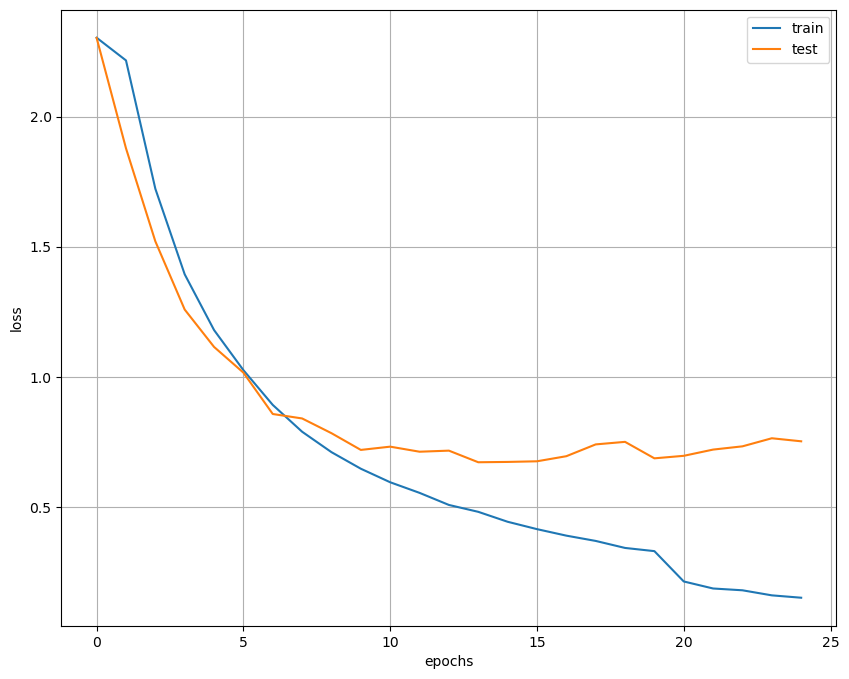

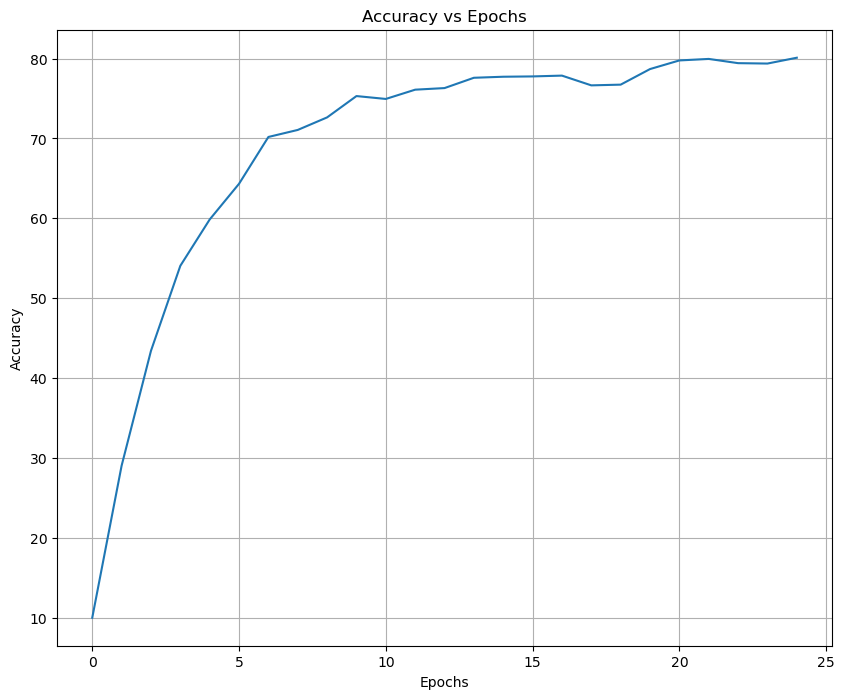

In [54]:
tsl5 = test_loss + test_loss2 + test_loss3 + test_loss4 
trl5 = train_loss + train_loss2 + train_loss3 + train_loss4
accl5 = acc + acc2 +acc3 +acc4 
plot_losses(trl5,tsl5)
plt.figure(figsize=(10,8))
plt.title("Accuracy vs Epochs")
plt.plot(np.arange(len(accl5) ),accl5) 
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()


In [63]:
import utils

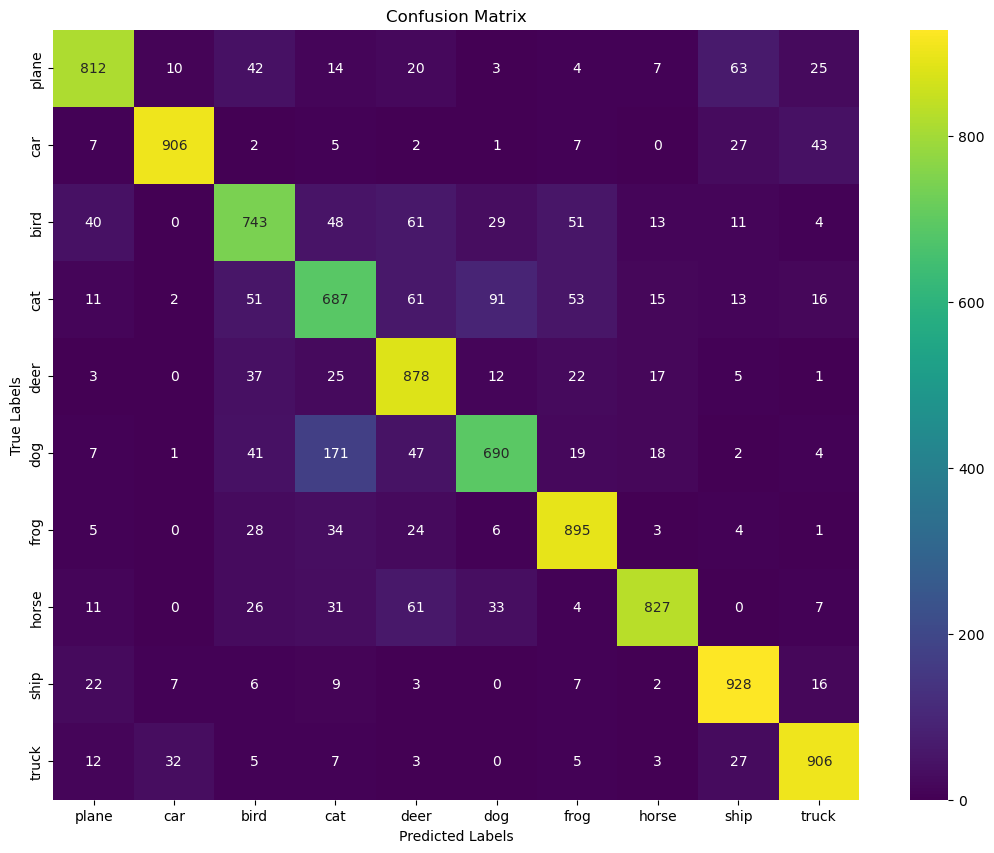

In [65]:
utils.print_confusion_matrix(net5conv,testset,classes)